In [1]:
from math import sqrt
import numpy as np

In [2]:
# создадим список, содержащий натуральные числа от 1 до 10
x = list(range(1, 11))
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Min-max нормализация

In [3]:
# определяем минимальное и максимальное значение в оригинальной структуре данных
min_x = min(x)
max_x = max(x)

# рассчитываем нормализованные значения элементов оригинальной структуры данных
x_normalized_min_max = [round((x_i - min_x) / (max_x - min_x), 2) for x_i in x]
print(x_normalized_min_max)

[0.0, 0.11, 0.22, 0.33, 0.44, 0.56, 0.67, 0.78, 0.89, 1.0]


# Нормализация по среднему

In [4]:
# вычисляем среднее значение в оригинальной структуре данных
mean_x = sum(x) / len(x)

# рассчитываем нормализованные по среднему значения элементов оригинальной структуры данных
x_normalized_mean = [round((x_i - mean_x) / (max_x - mean_x), 2) for x_i in x]
print(x_normalized_mean)

[-1.0, -0.78, -0.56, -0.33, -0.11, 0.11, 0.33, 0.56, 0.78, 1.0]


# Стандартизация (Нормализация Z-оценки)

In [5]:
# вычисляем дисперсию в оригинальной структуре данных
variance_x = sqrt(sum([((x_i - mean_x) ** 2) for x_i in x])  / len(x))

# рассчитываем стандартизированные значения элементов оригинальной структуры данных
x_standardized = [round((x_i - mean_x) / variance_x, 2) for x_i in x]
print(x_standardized)

[-1.57, -1.22, -0.87, -0.52, -0.17, 0.17, 0.52, 0.87, 1.22, 1.57]


# Масштабирование

In [6]:
# вычисляем L2-норму оригинального вектора
l2_norm = sqrt(sum([x_i ** 2 for x_i in x]))

# масштабируем элементы списка
x_scaled = [round(x_i / l2_norm, 2) for x_i in x]
print(x_scaled)

[0.05, 0.1, 0.15, 0.2, 0.25, 0.31, 0.36, 0.41, 0.46, 0.51]


# Метод главных компонент (Principal Component Analysis)

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.preprocessing import StandardScaler

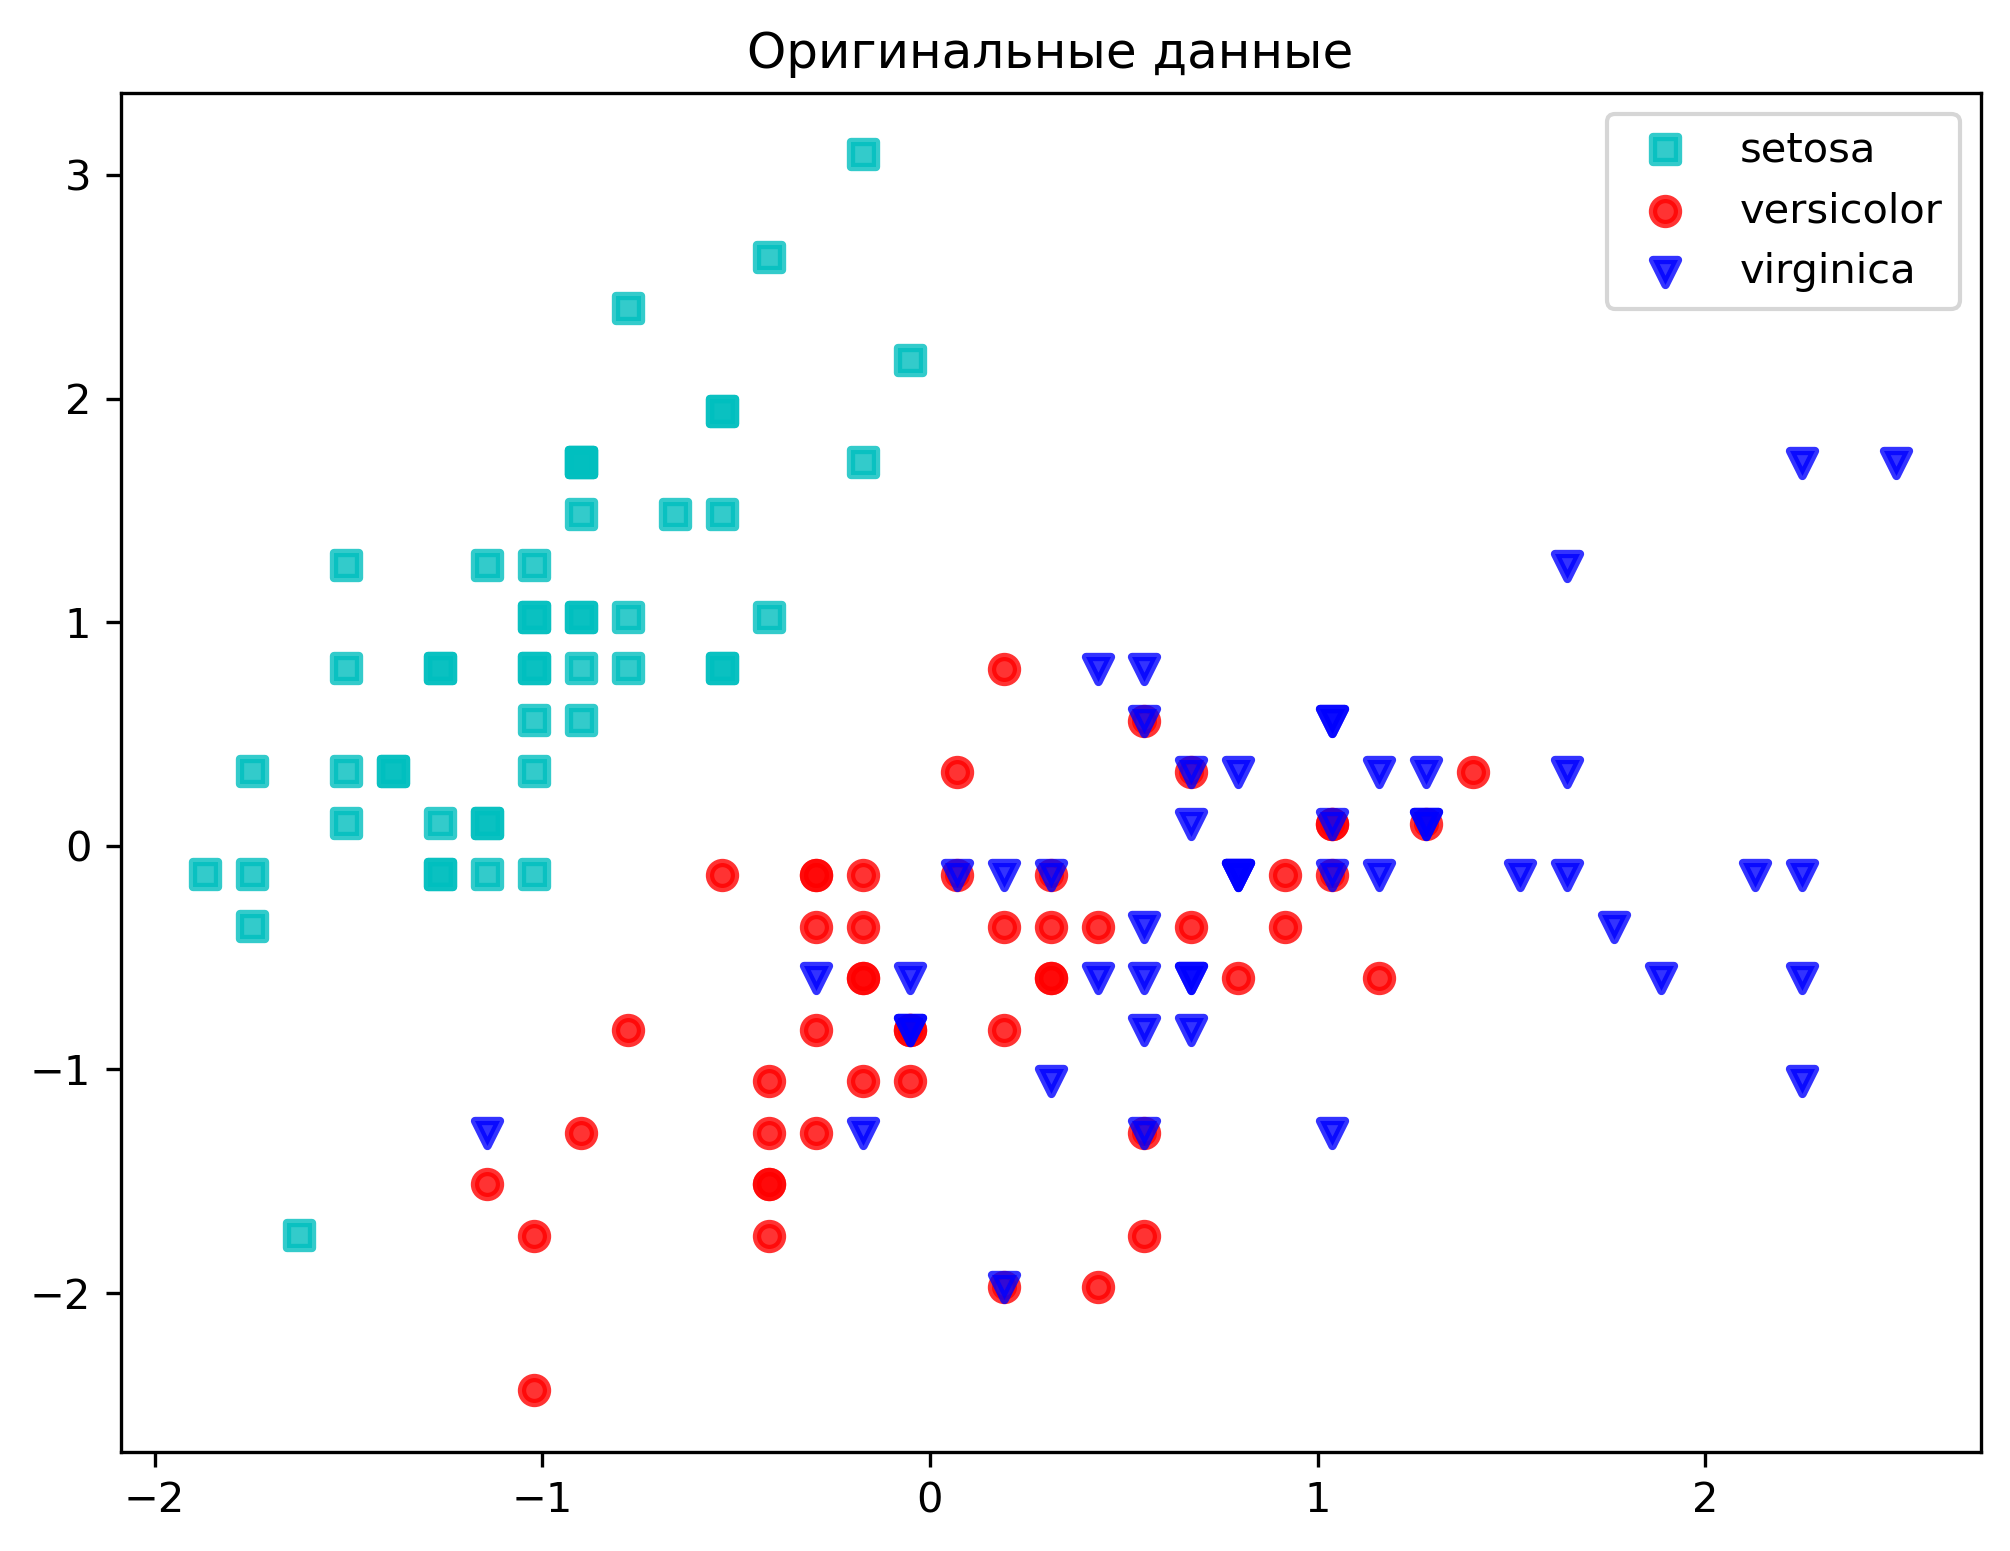

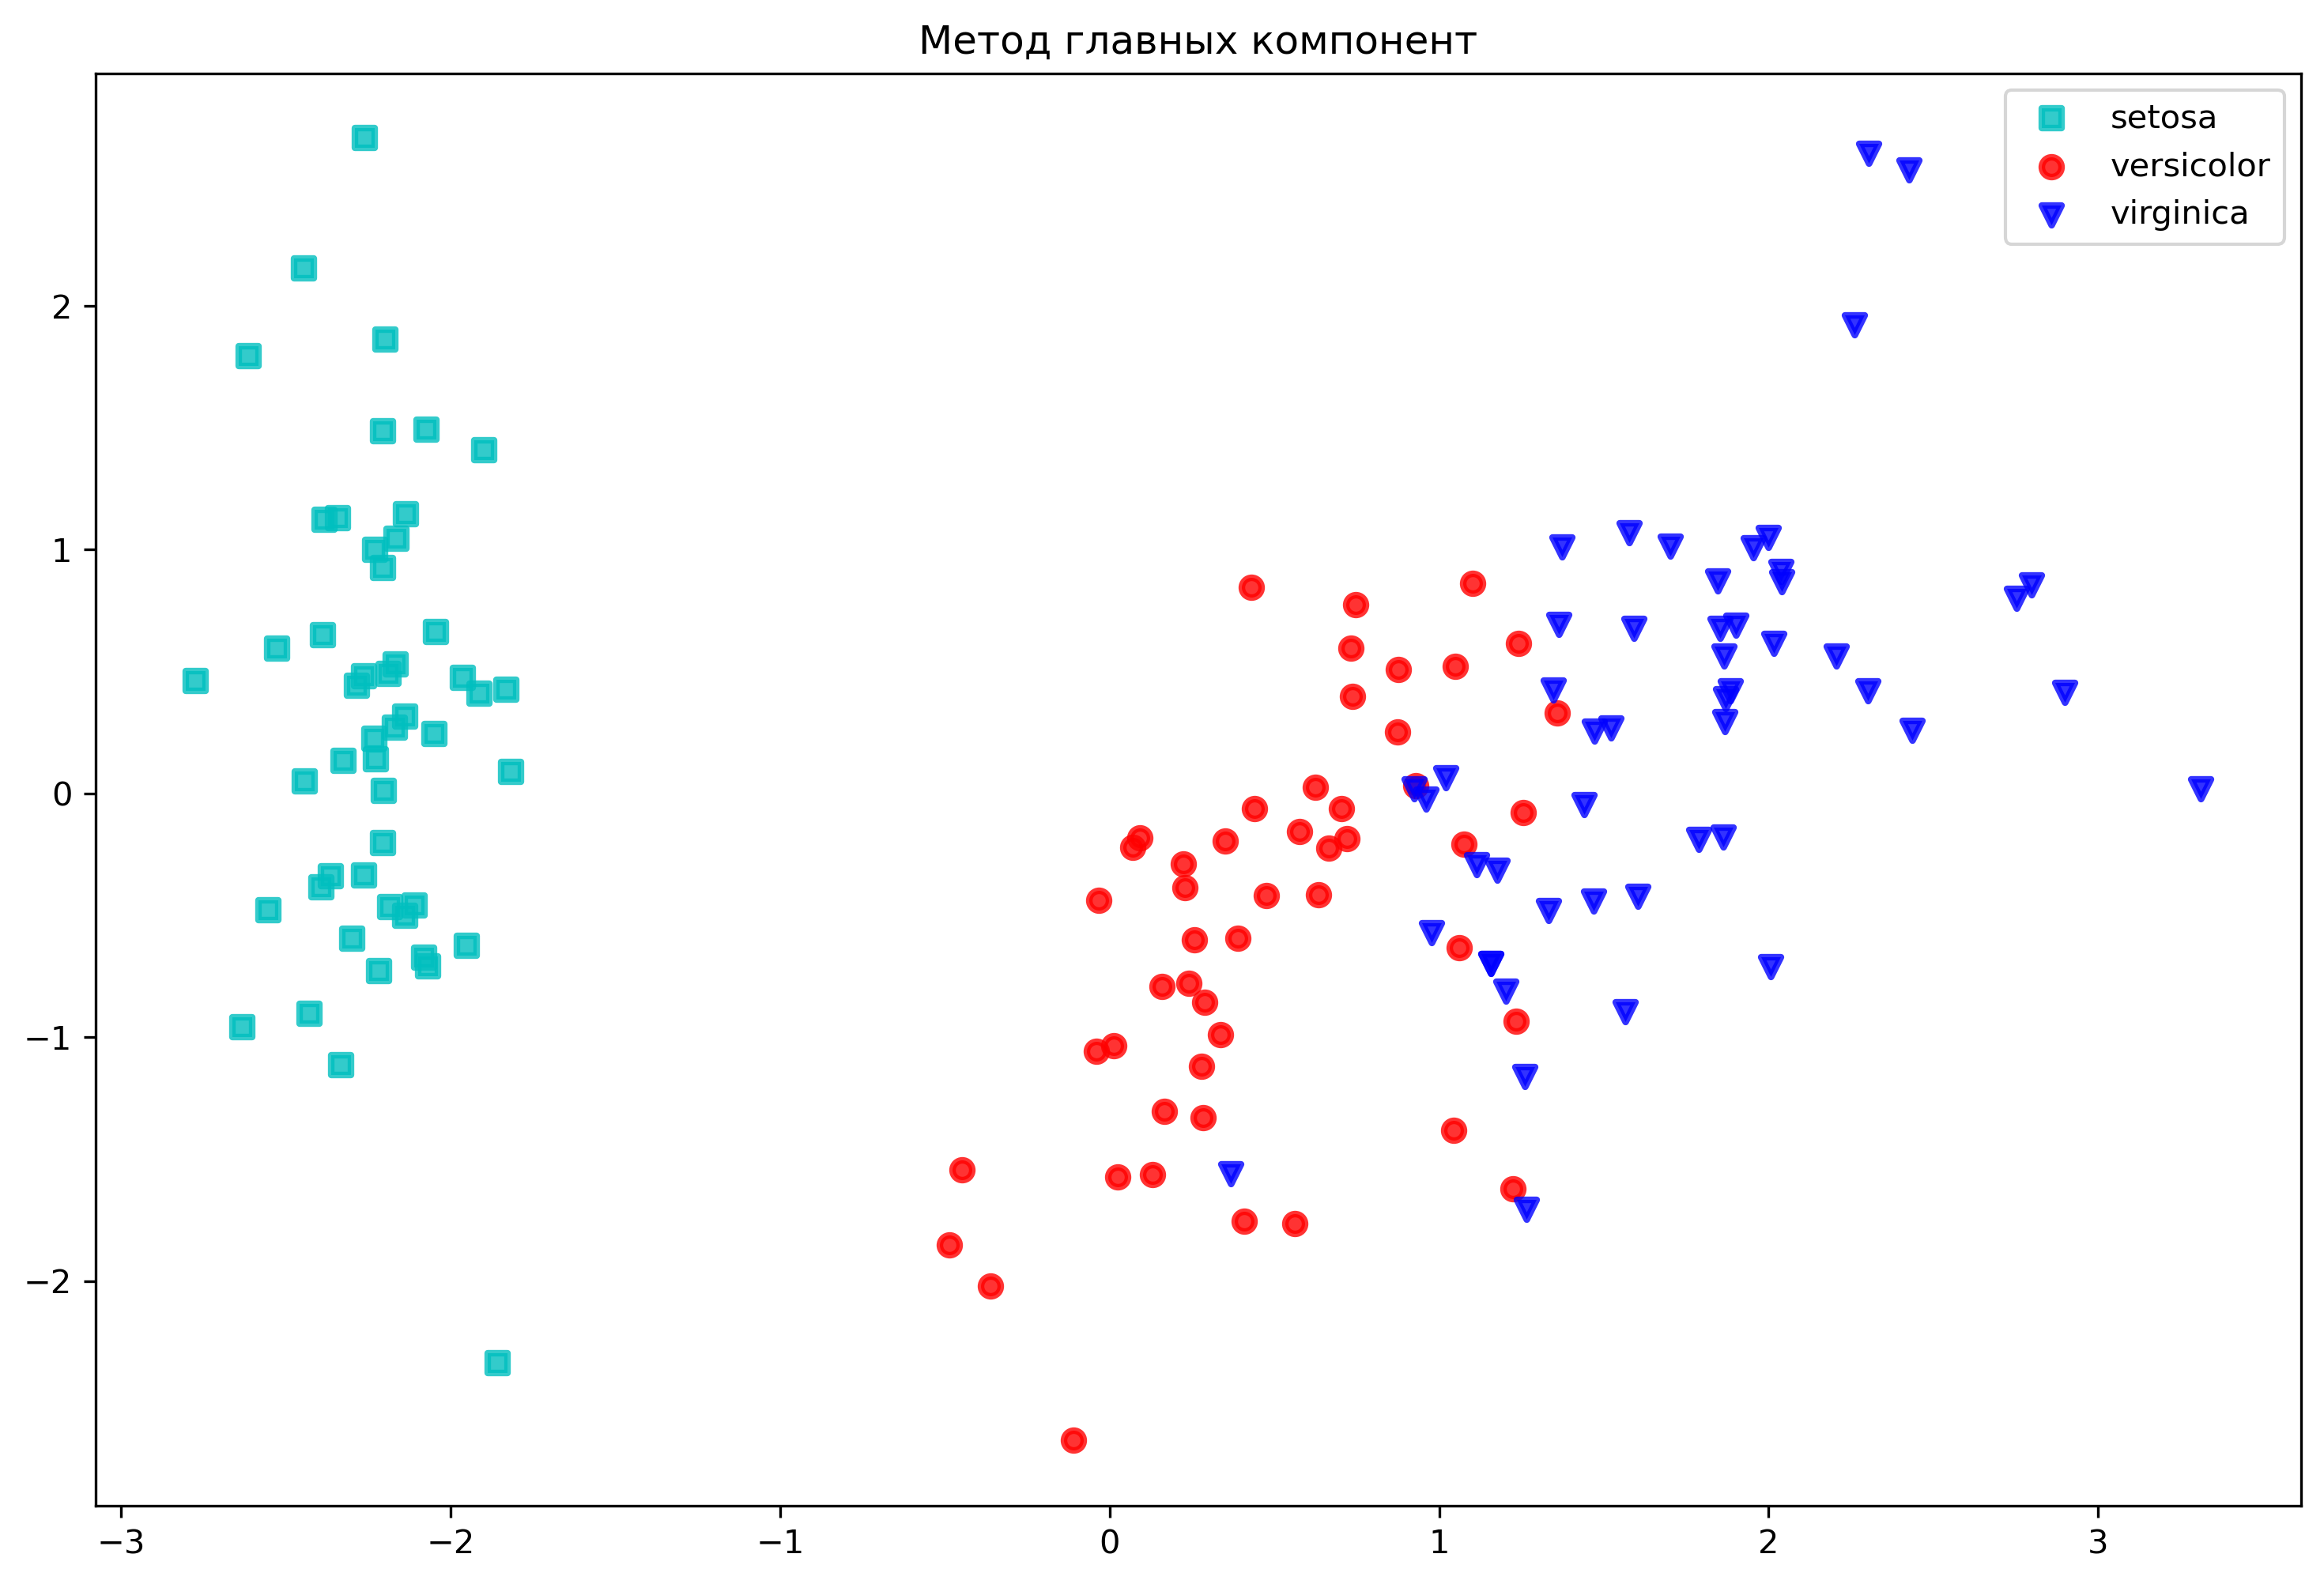

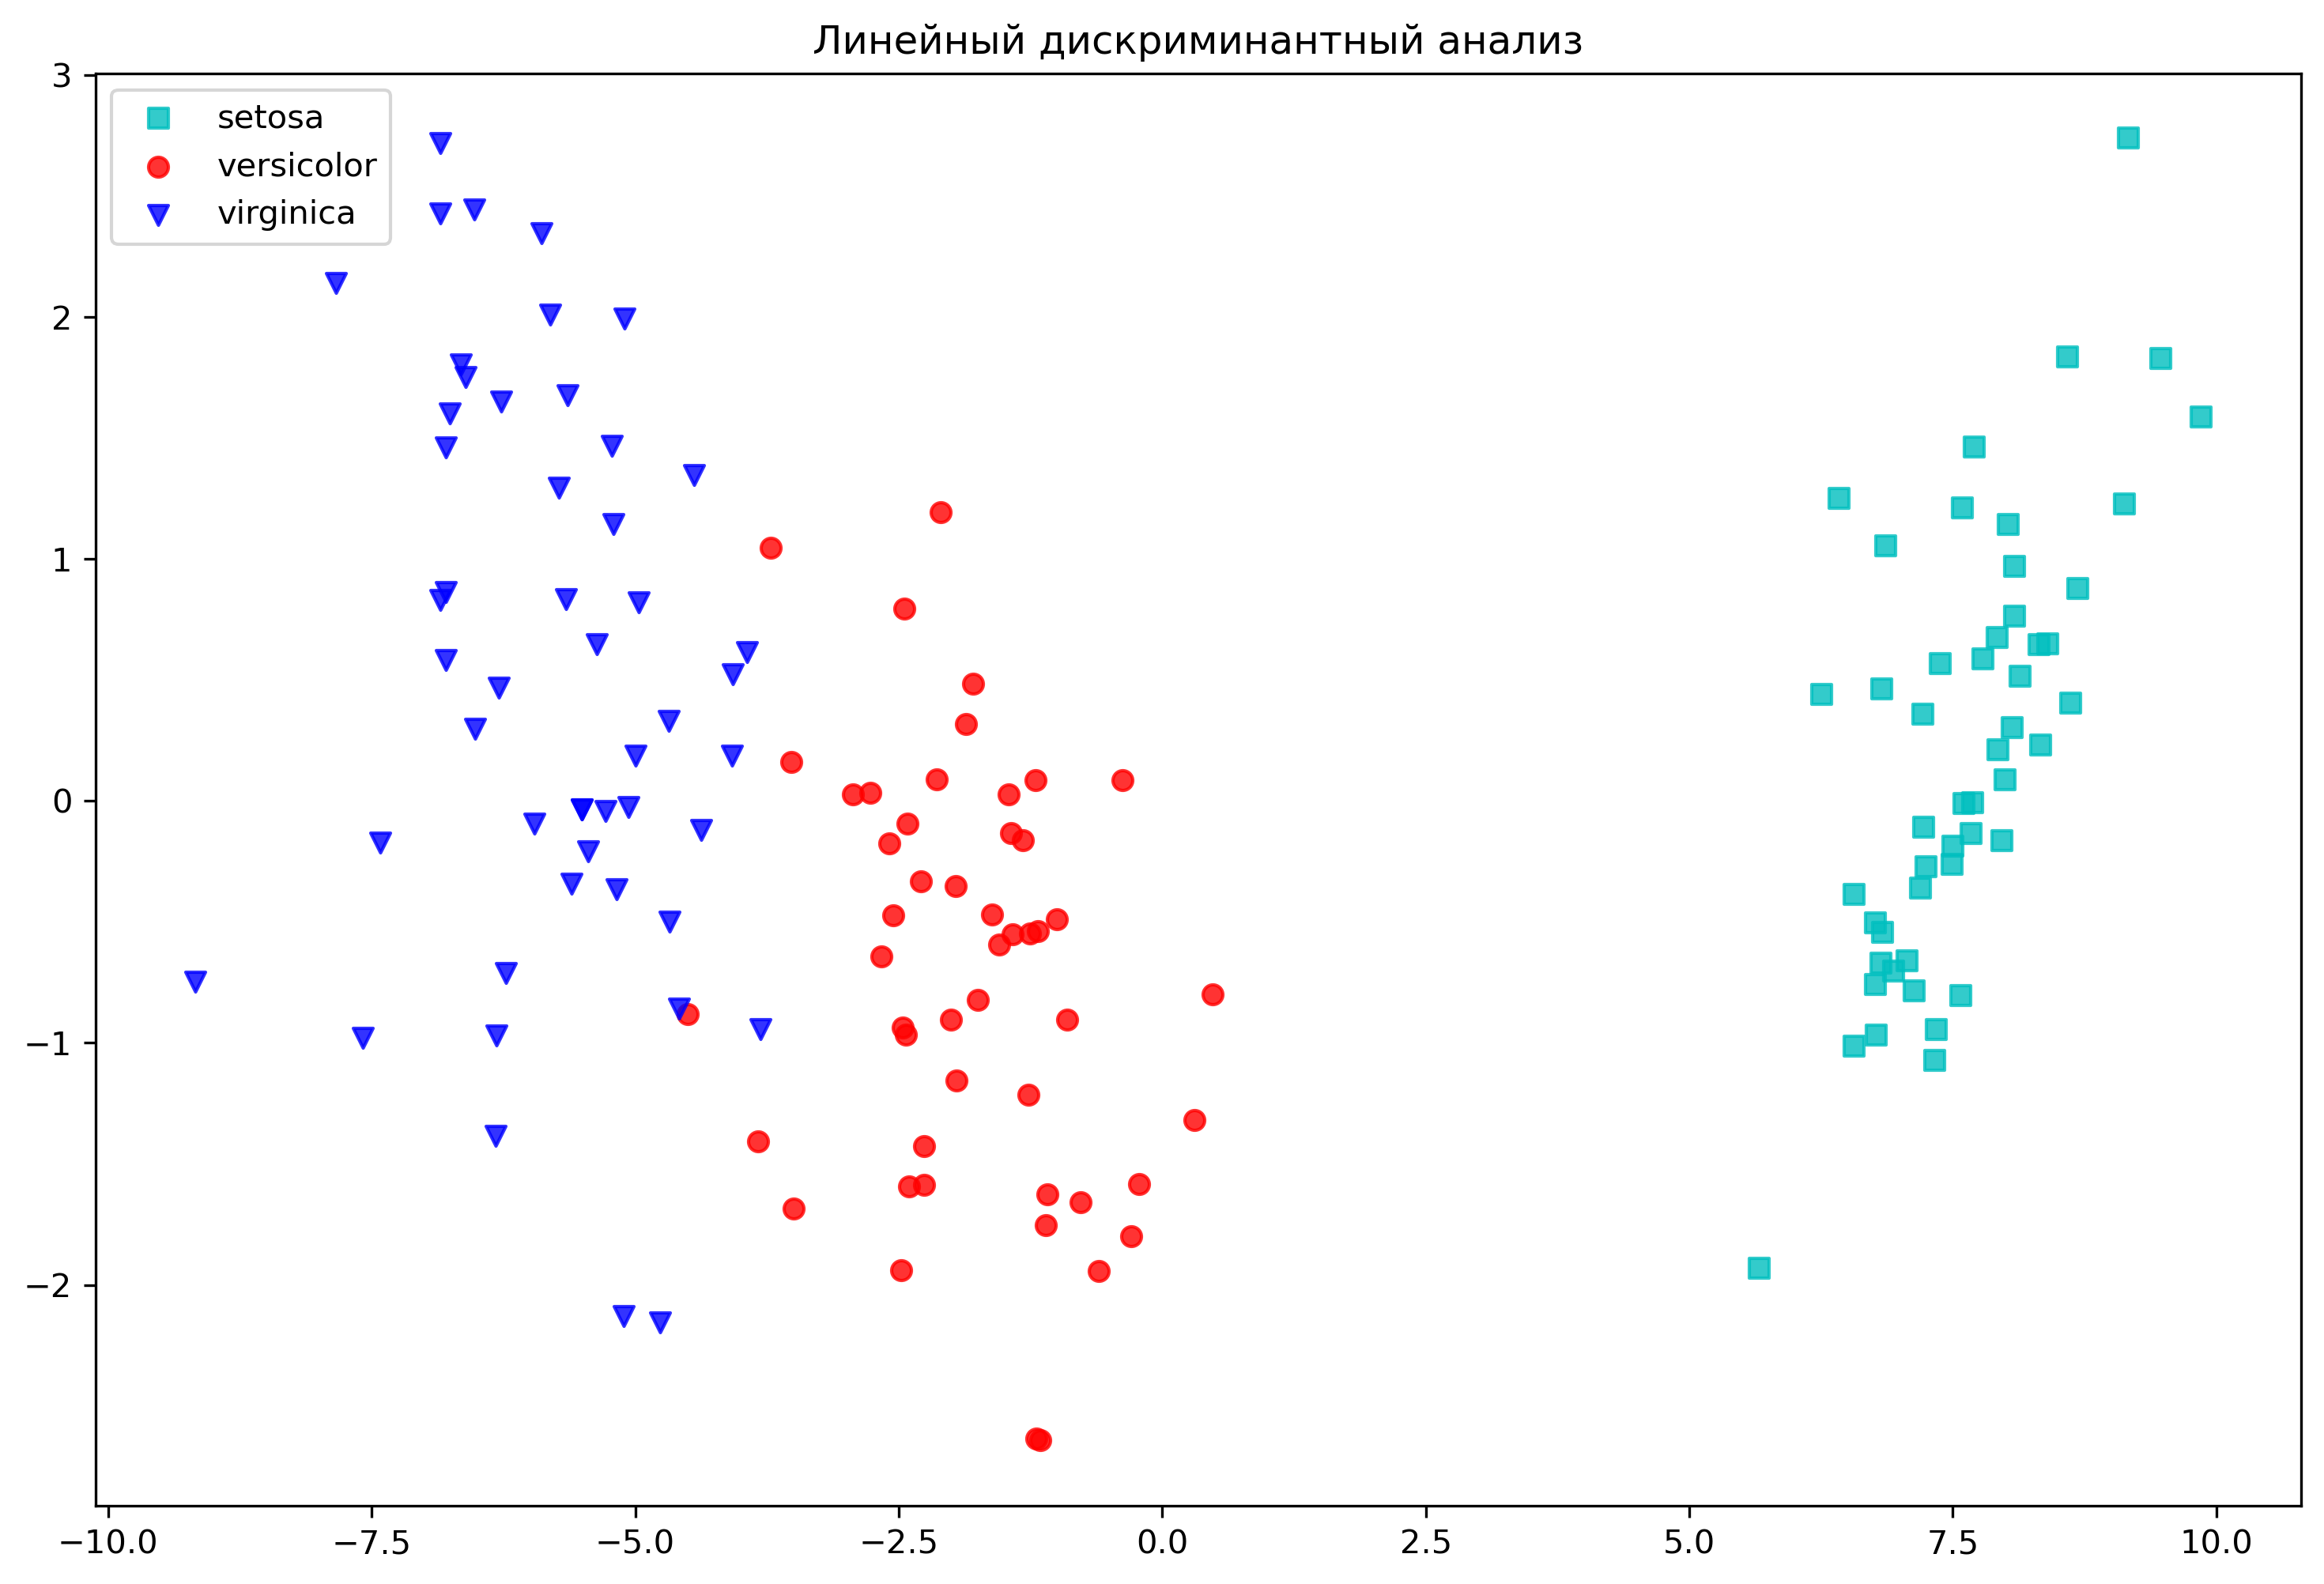

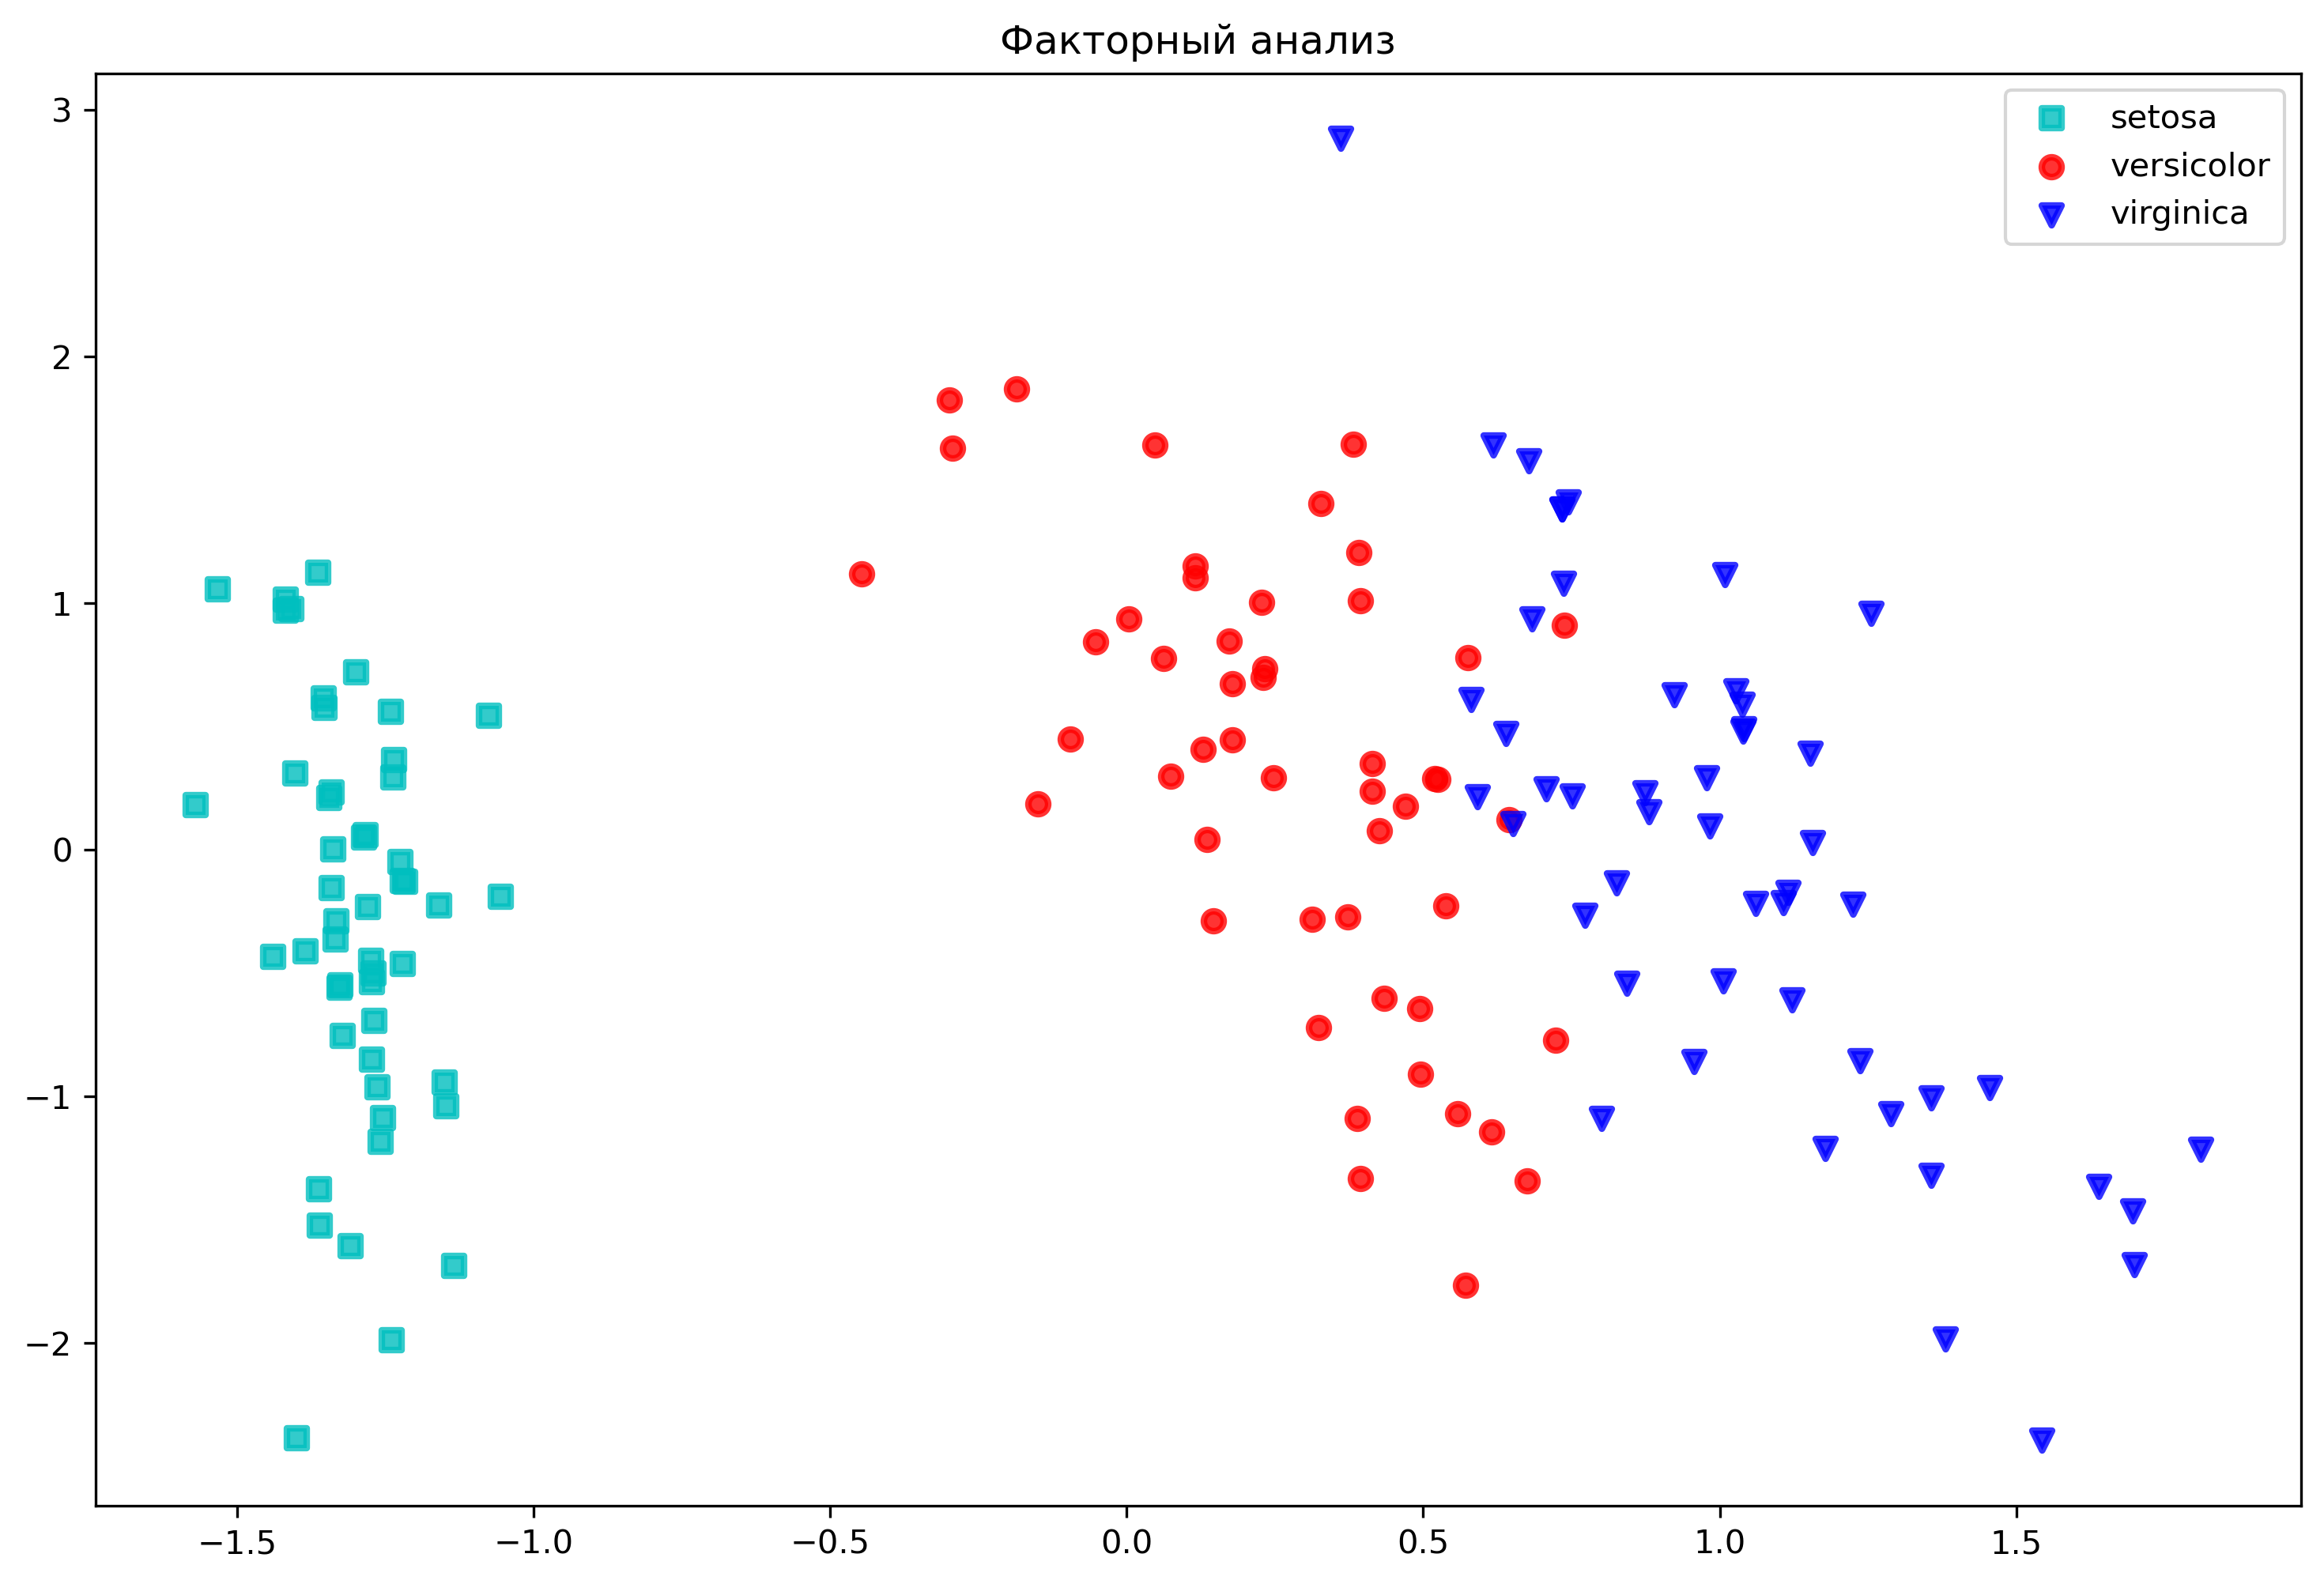

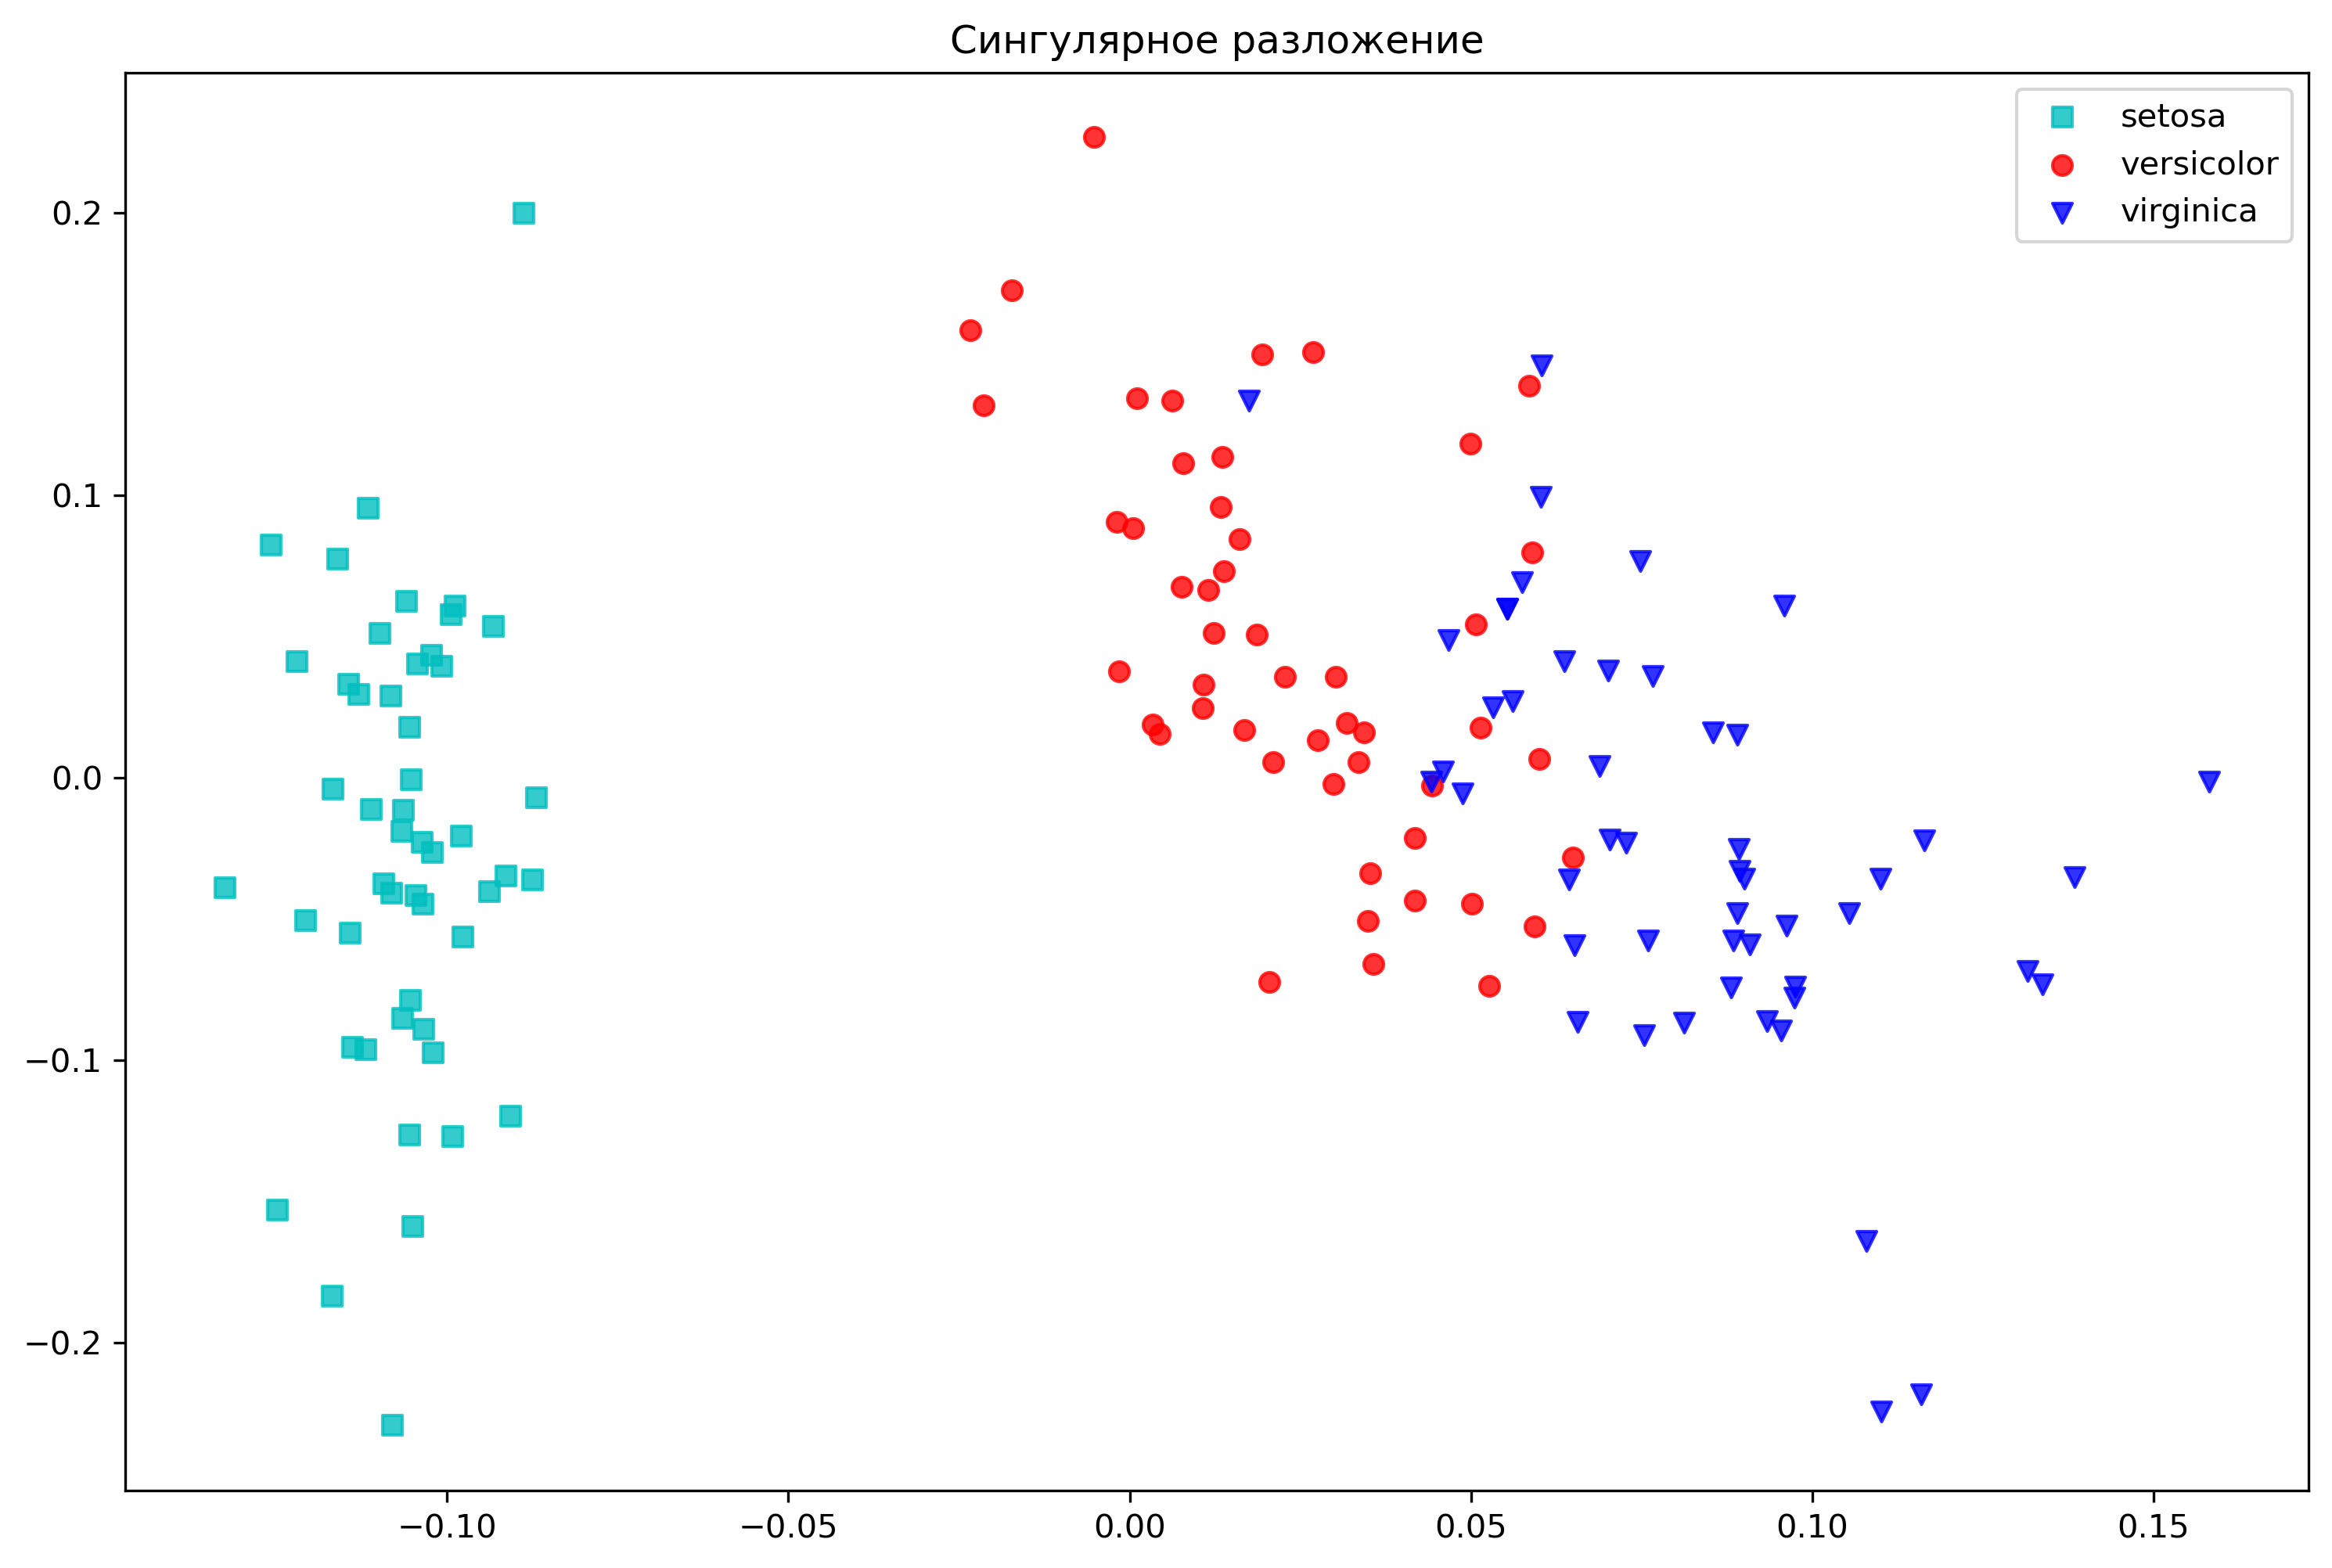

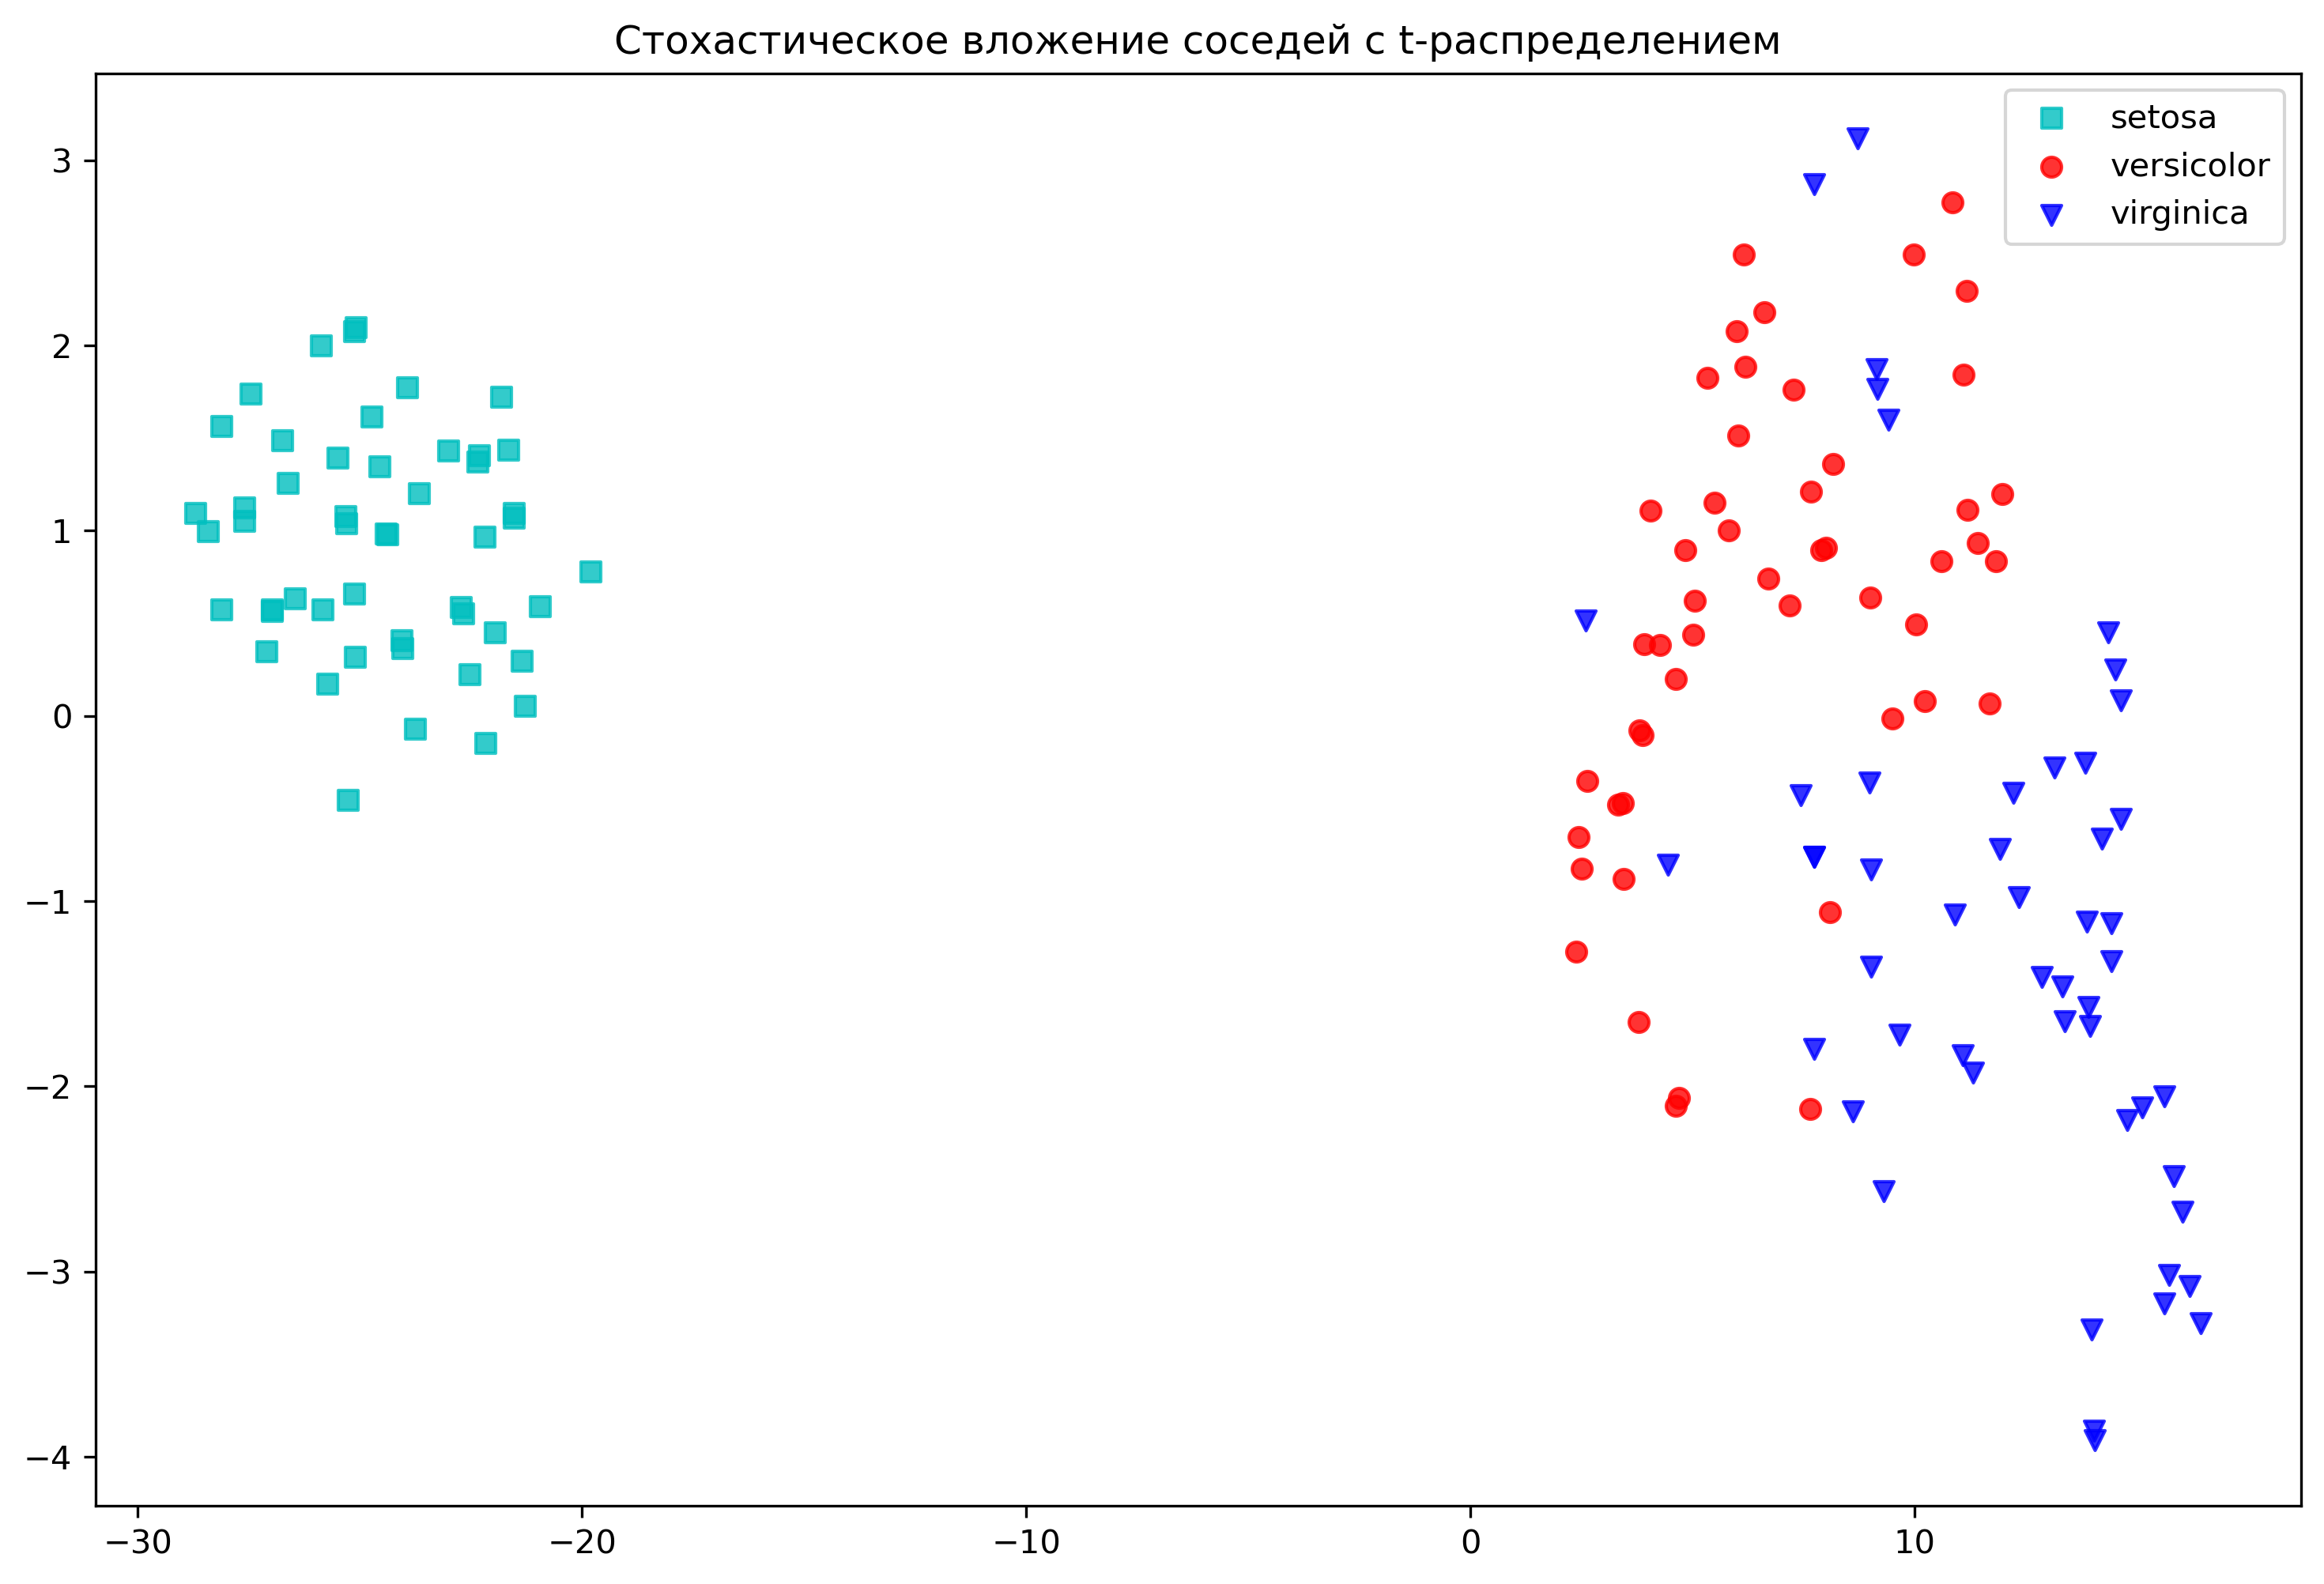

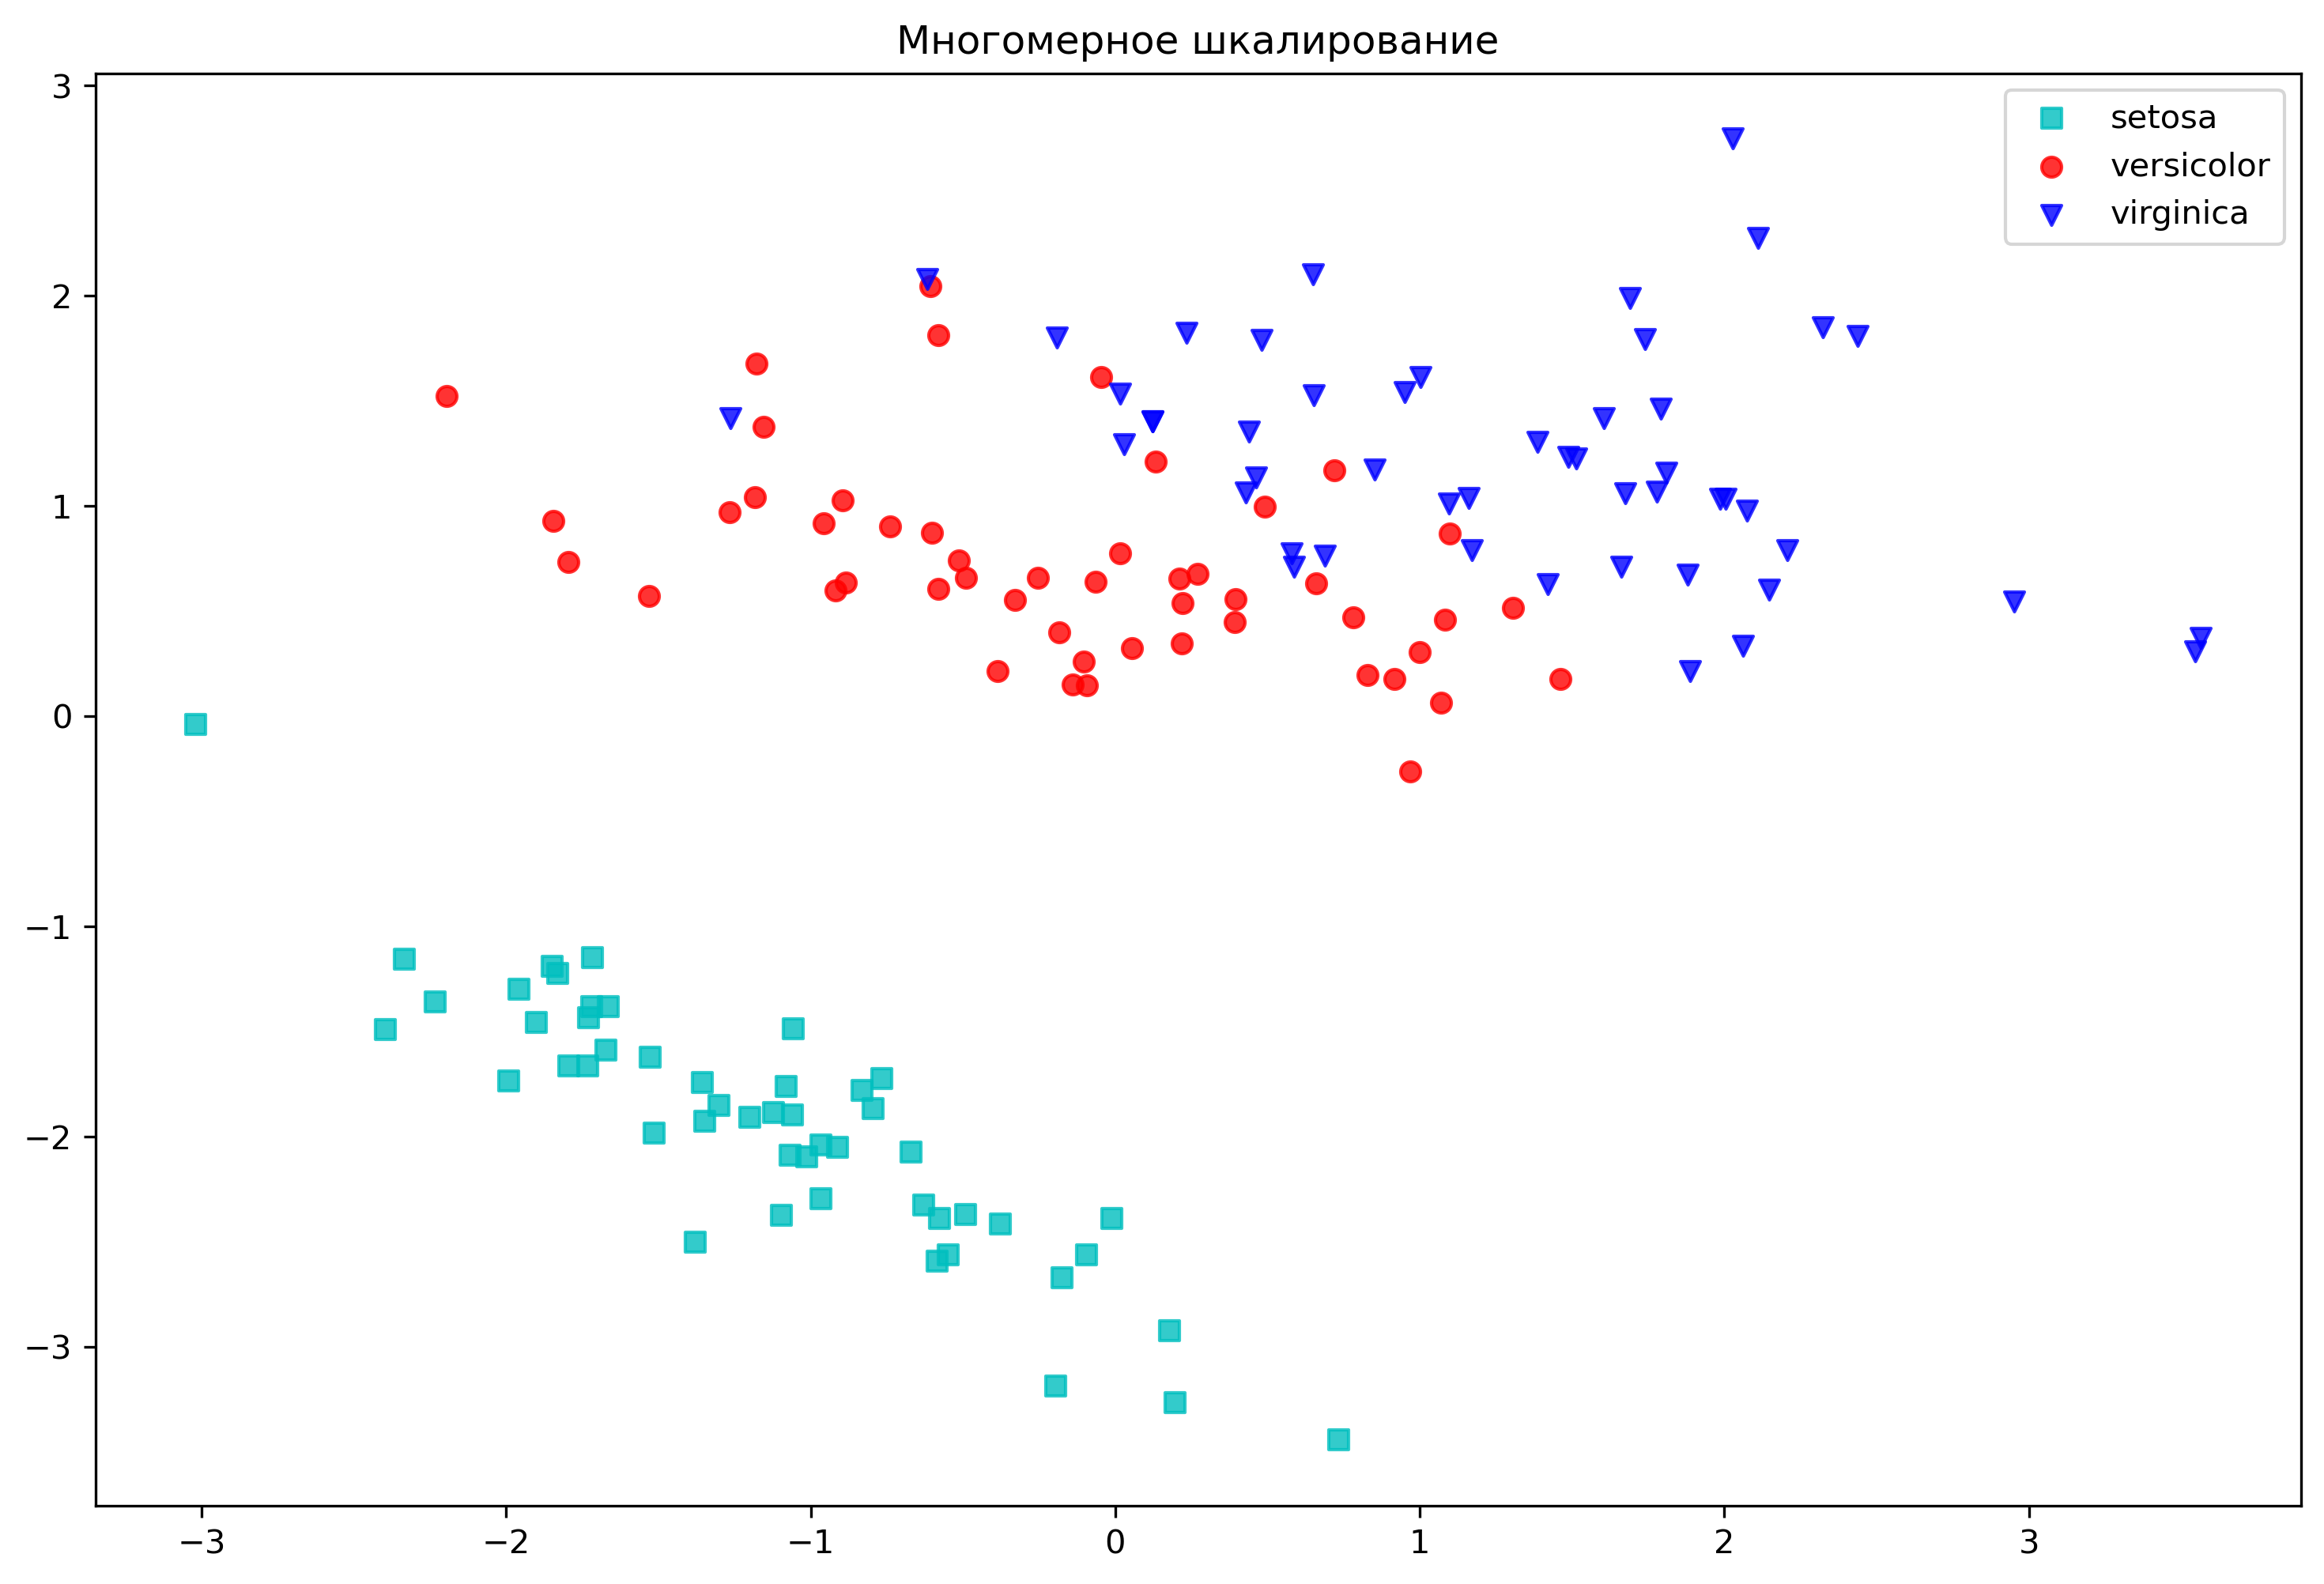

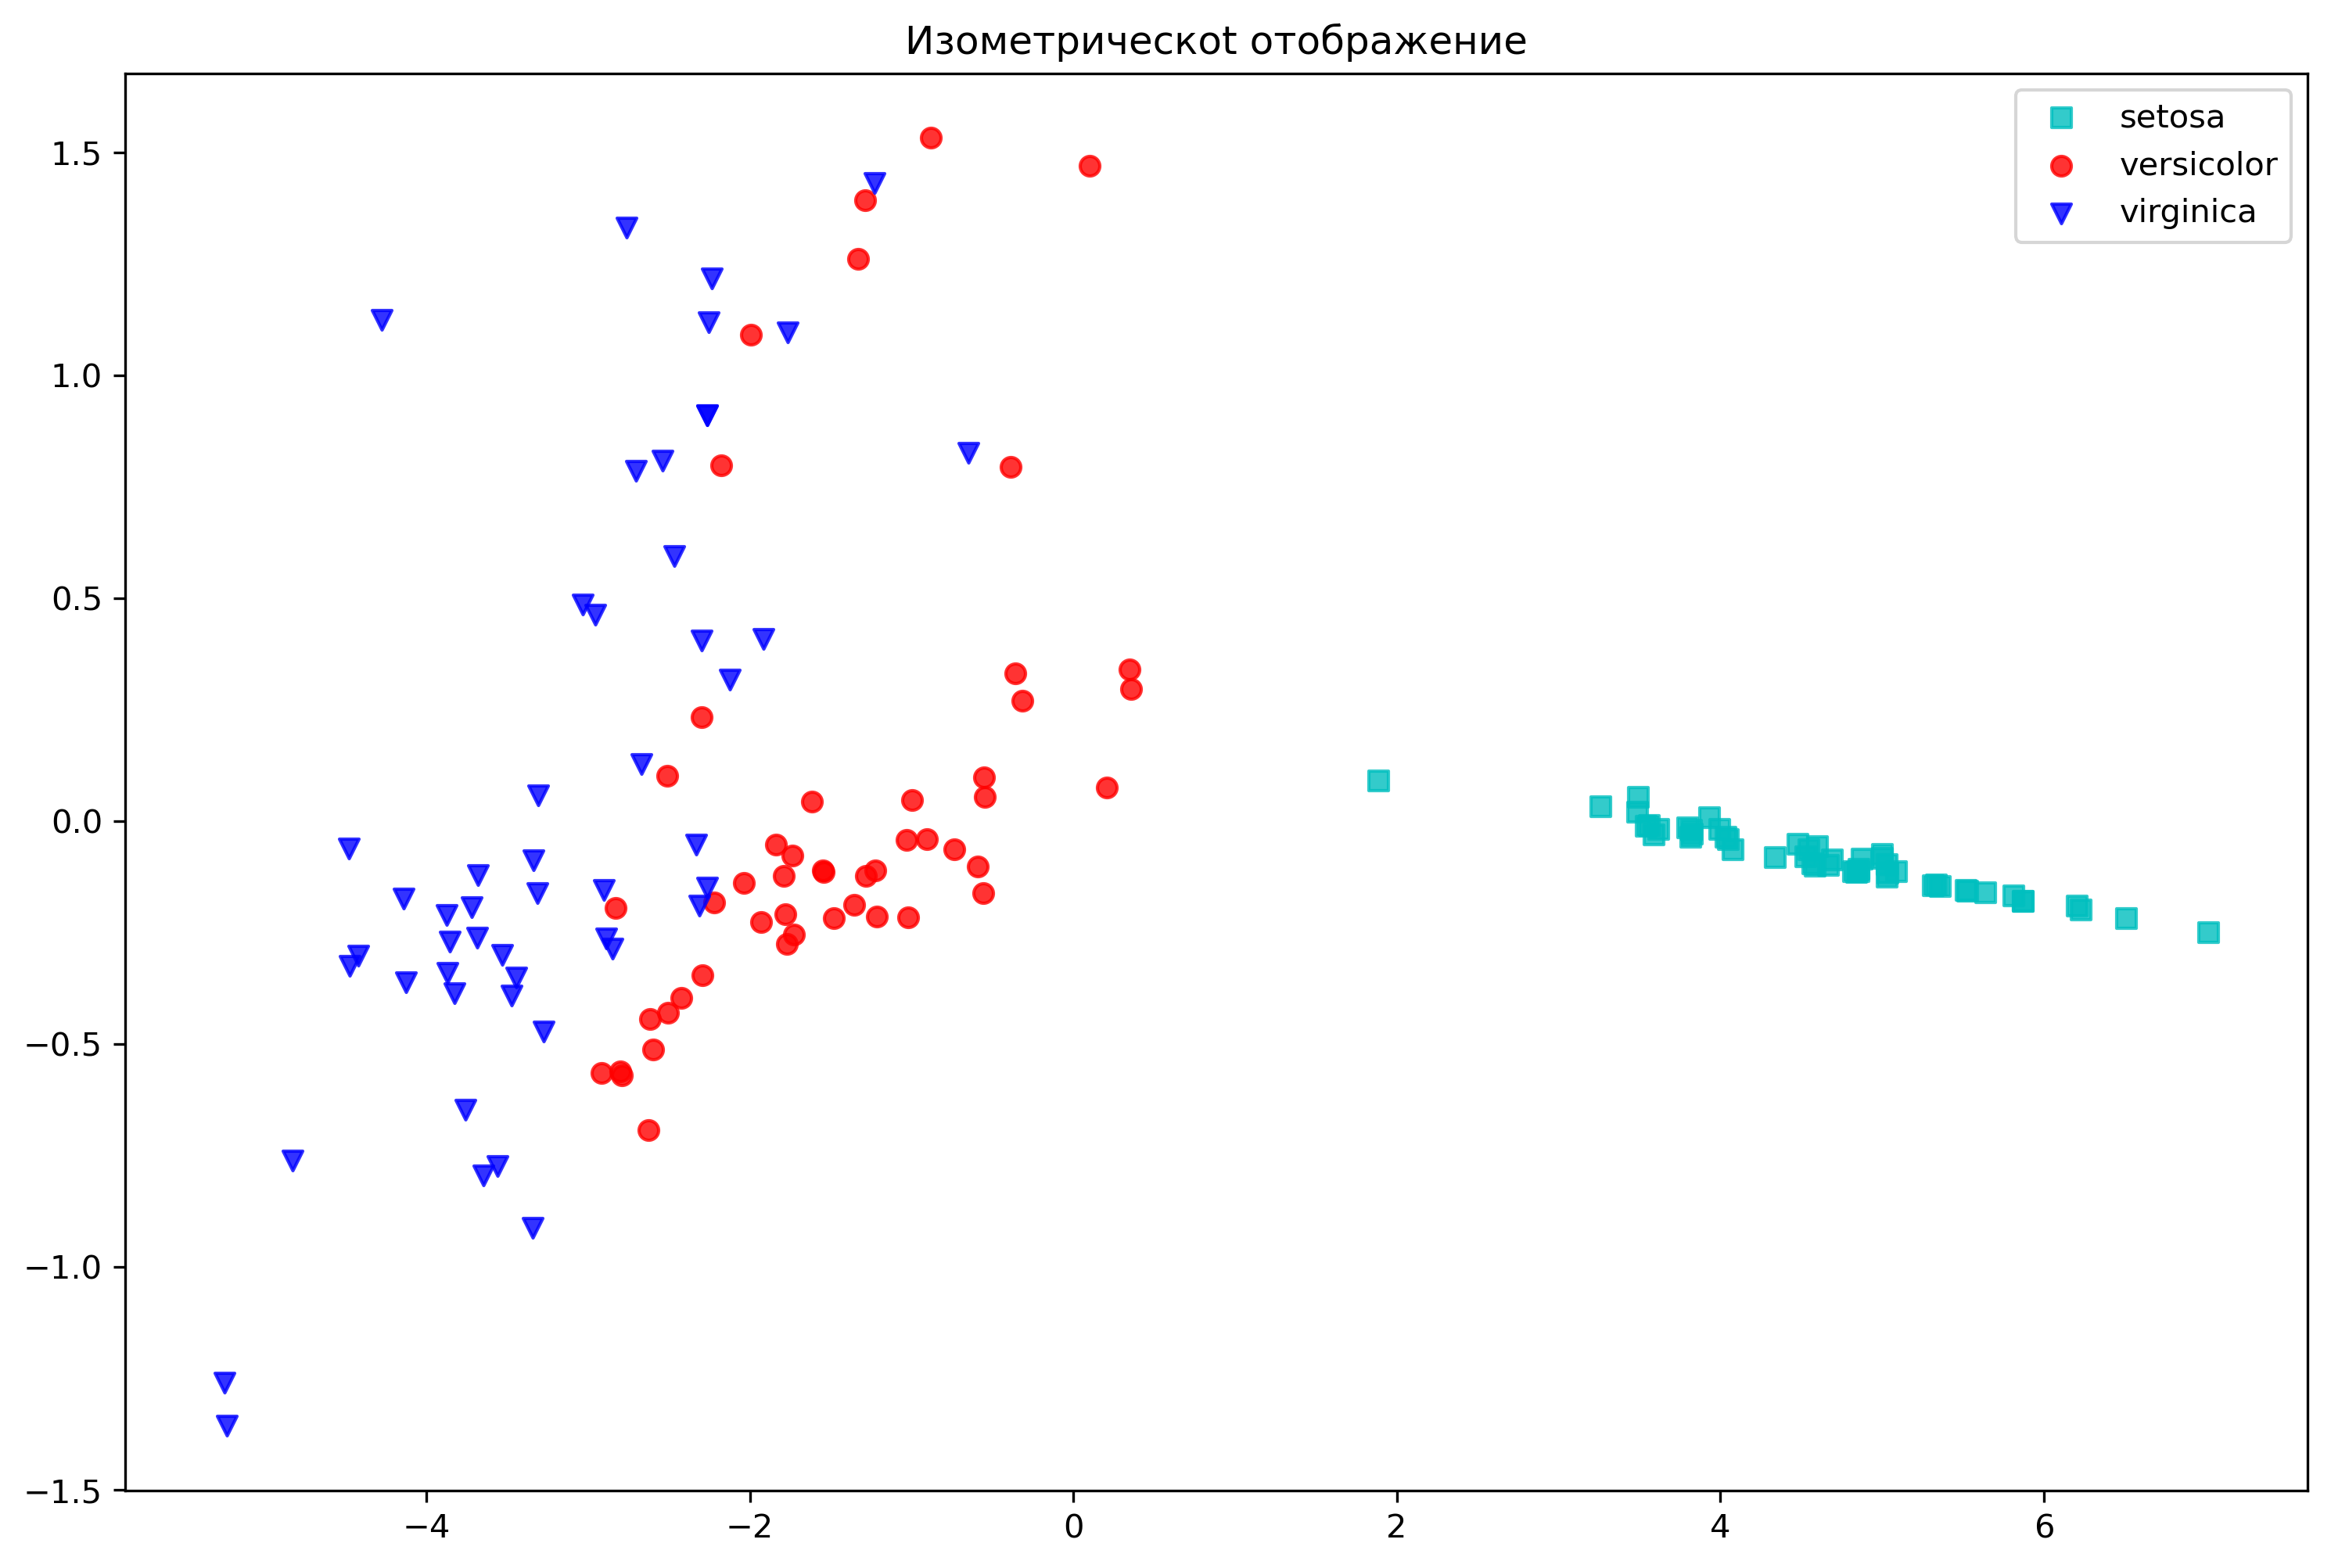

In [10]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

# стандартизируем входные данные
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X, y)

markers = [ "," , "o" , "v"]
colors = ["c", "r", "b"]
lw = 2

# инициализируем класс для Метода главных компонент, указываем количество компонент для анализа
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# инициализируем класс для Линейного дискриминантного анализа, указываем количество компонент для анализа
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# инициализируем класс для Факторного анализа, указываем количество компонент для анализа
fa = FactorAnalysis(n_components=2)
X_r3 = fa.fit_transform(X, y)

# вычисляем сингулярное разложение
U, S, Vt = np.linalg.svd(X)

# инициализируем класс для Стохастического вложения соседей с t-распределением
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

# инициализируем класс для Многомерного шкалирования
mds = MDS(n_components=2, n_init=1, max_iter=100)
X_mds = mds.fit_transform(X)

# инициализируем класс для Изометрического отображения
iso = Isomap(n_neighbors=10, n_components=2)
X_iso = iso.fit_transform(X)


plt.figure(figsize=(8,6), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, marker=marker, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Оригинальные данные')

plt.figure(figsize=(12,8), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, marker=marker, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Метод главных компонент')

plt.figure(figsize=(12,8), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, marker=marker,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Линейный дискриминантный анализ')

plt.figure(figsize=(12,8), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):
    plt.scatter(X_r3[y == i, 0], X_r3[y == i, 1], color=color, marker=marker, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Факторный анализ')

plt.figure(figsize=(12,8), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):
    plt.scatter(U[y == i, 0], U[y == i, 1], alpha=.8, color=color, marker=marker,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Сингулярное разложение')

plt.figure(figsize=(12,8), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], alpha=.8, color=color, marker=marker,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Стохастическое вложение соседей с t-распределением')

plt.figure(figsize=(12,8), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):
    plt.scatter(X_mds[y == i, 0], X_mds[y == i, 1], alpha=.8, color=color, marker=marker,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Многомерное шкалирование')

plt.figure(figsize=(12,8), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):
    plt.scatter(X_iso[y == i, 0], X_iso[y == i, 1], alpha=.8, color=color, marker=marker,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Изометрическоt отображение')


plt.show()

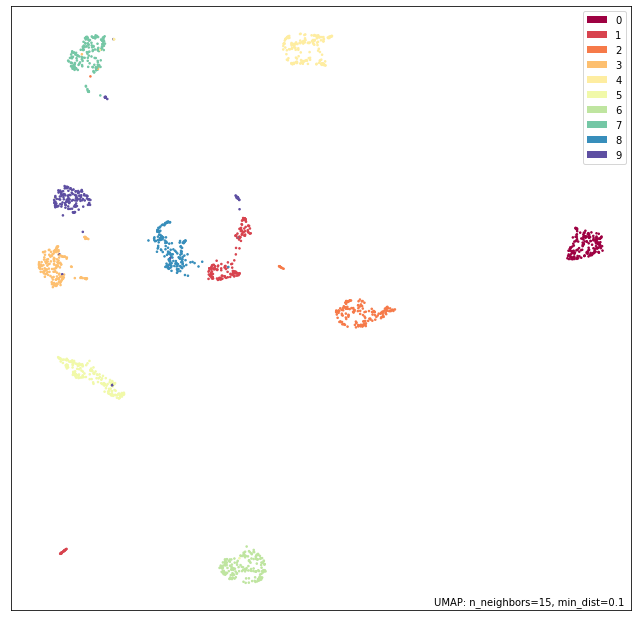

In [8]:
import umap
import umap.plot
from sklearn import datasets

digits = datasets.load_digits()

mapper = umap.UMAP().fit(digits.data)
umap.plot.points(mapper, labels=digits.target)

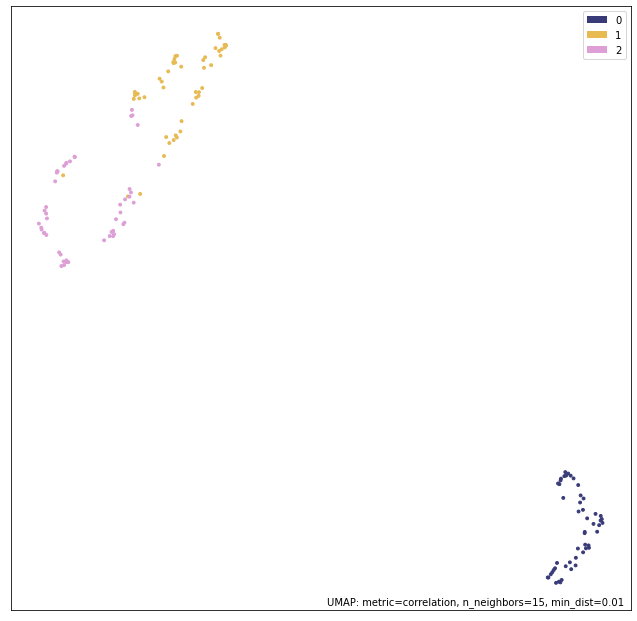

In [10]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

mapper = umap.UMAP(n_neighbors=15,
                  min_dist=0.01,
                  metric='correlation').fit(X)
umap.plot.points(mapper, labels=y, theme="red")

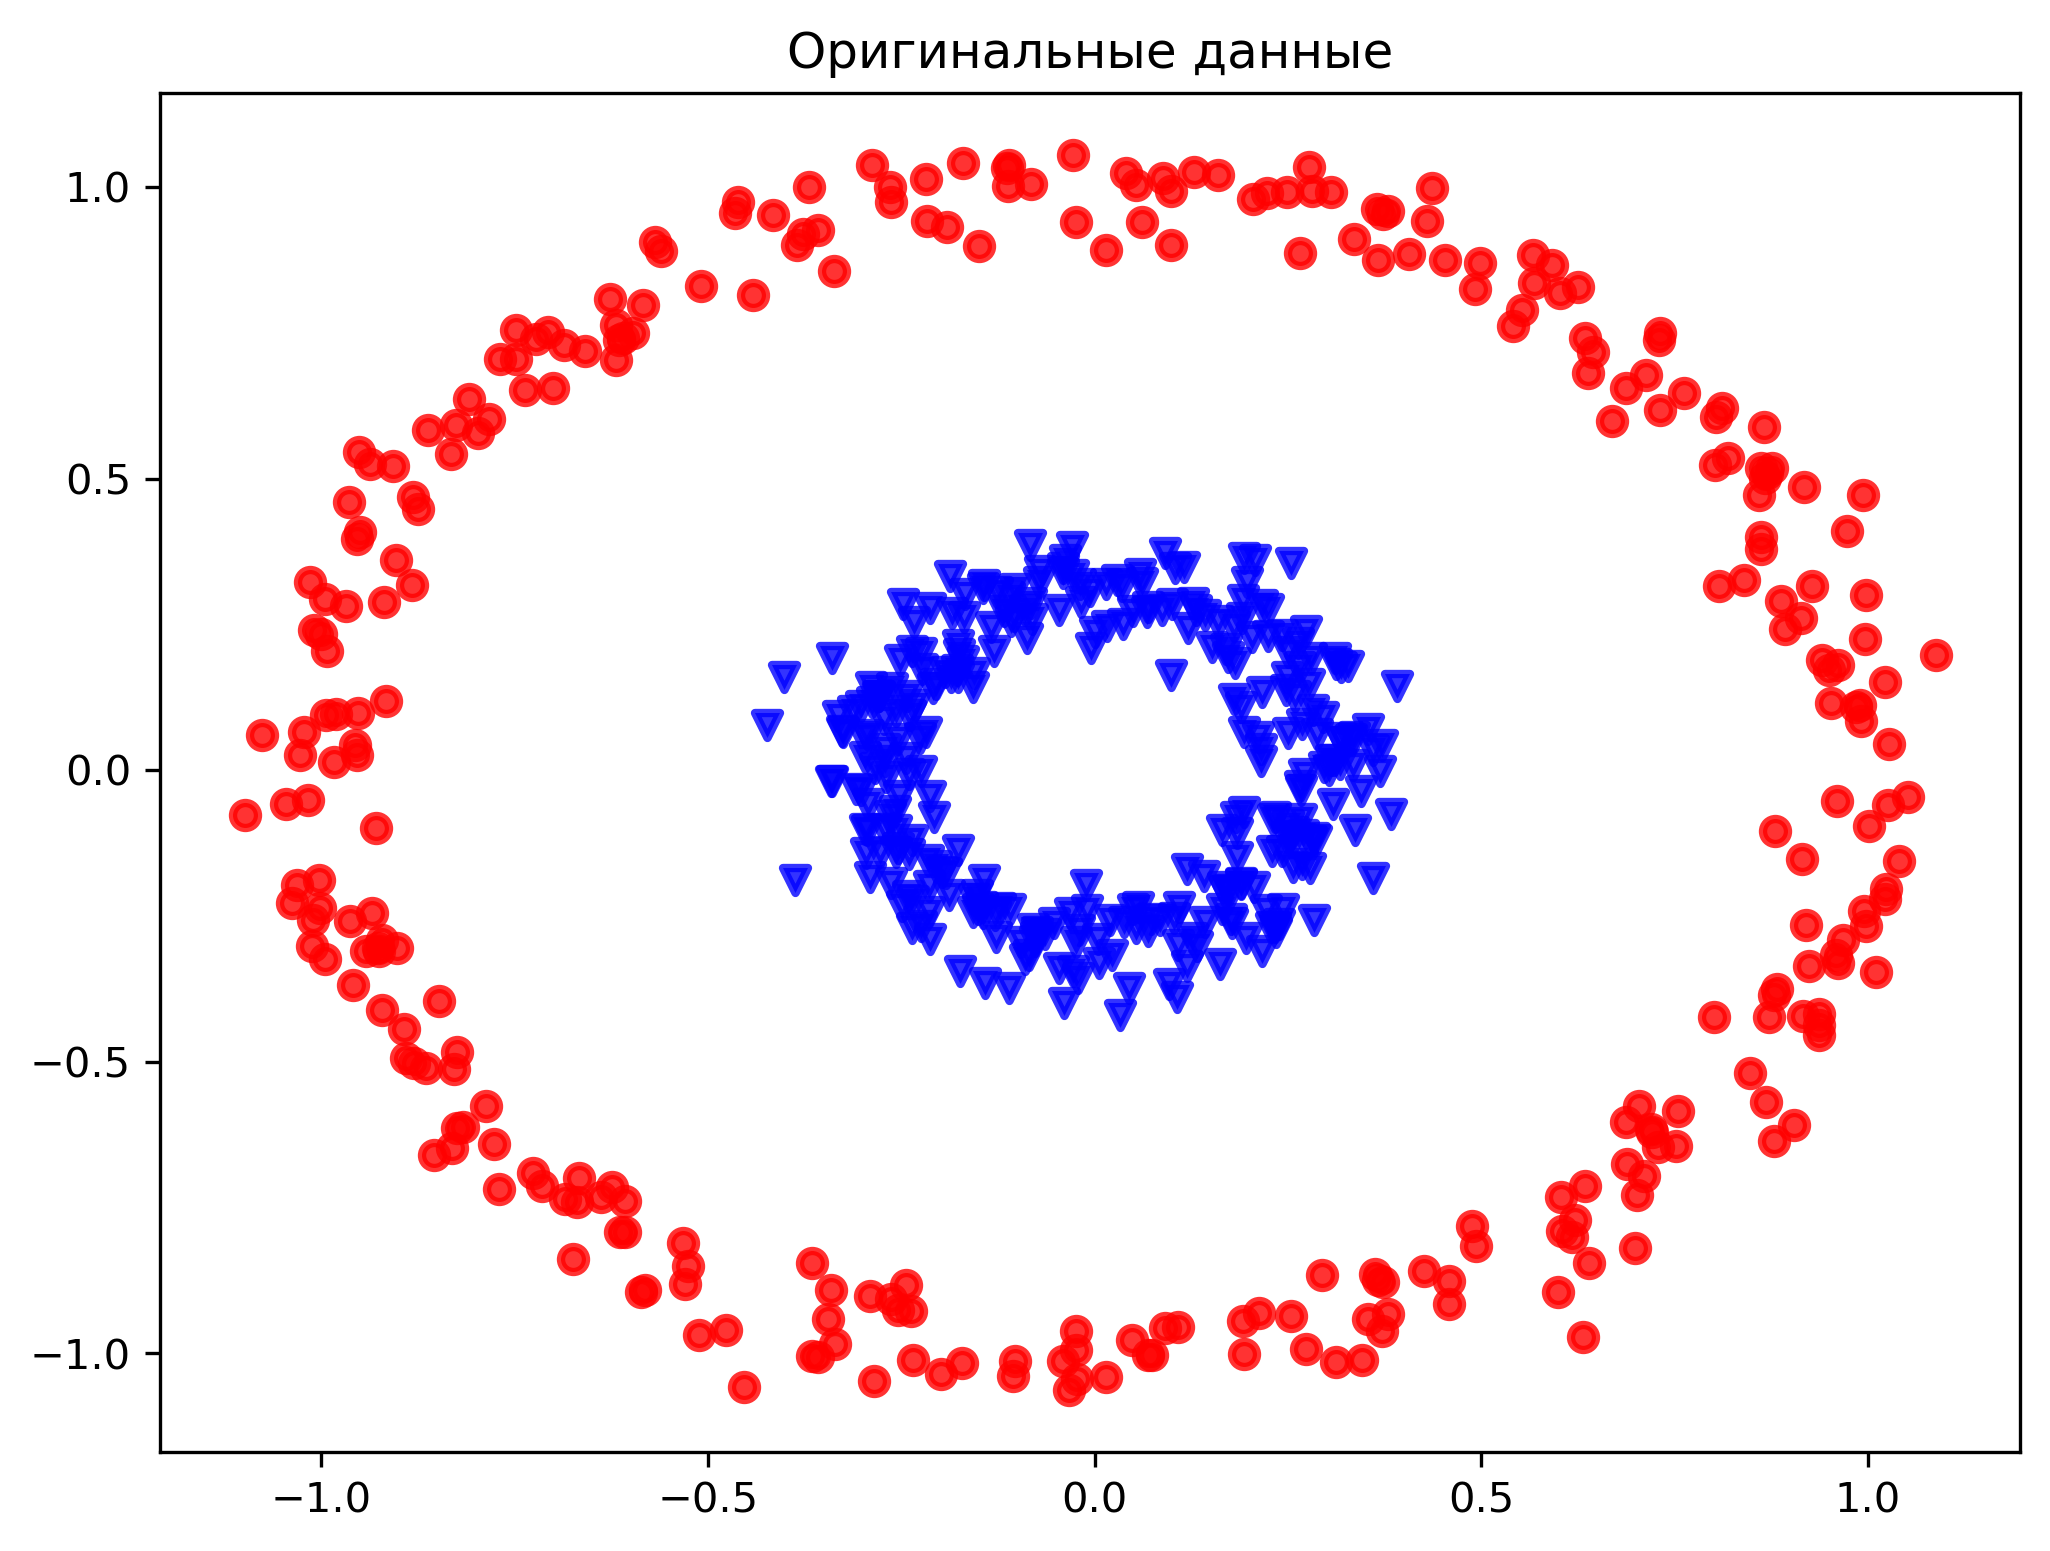

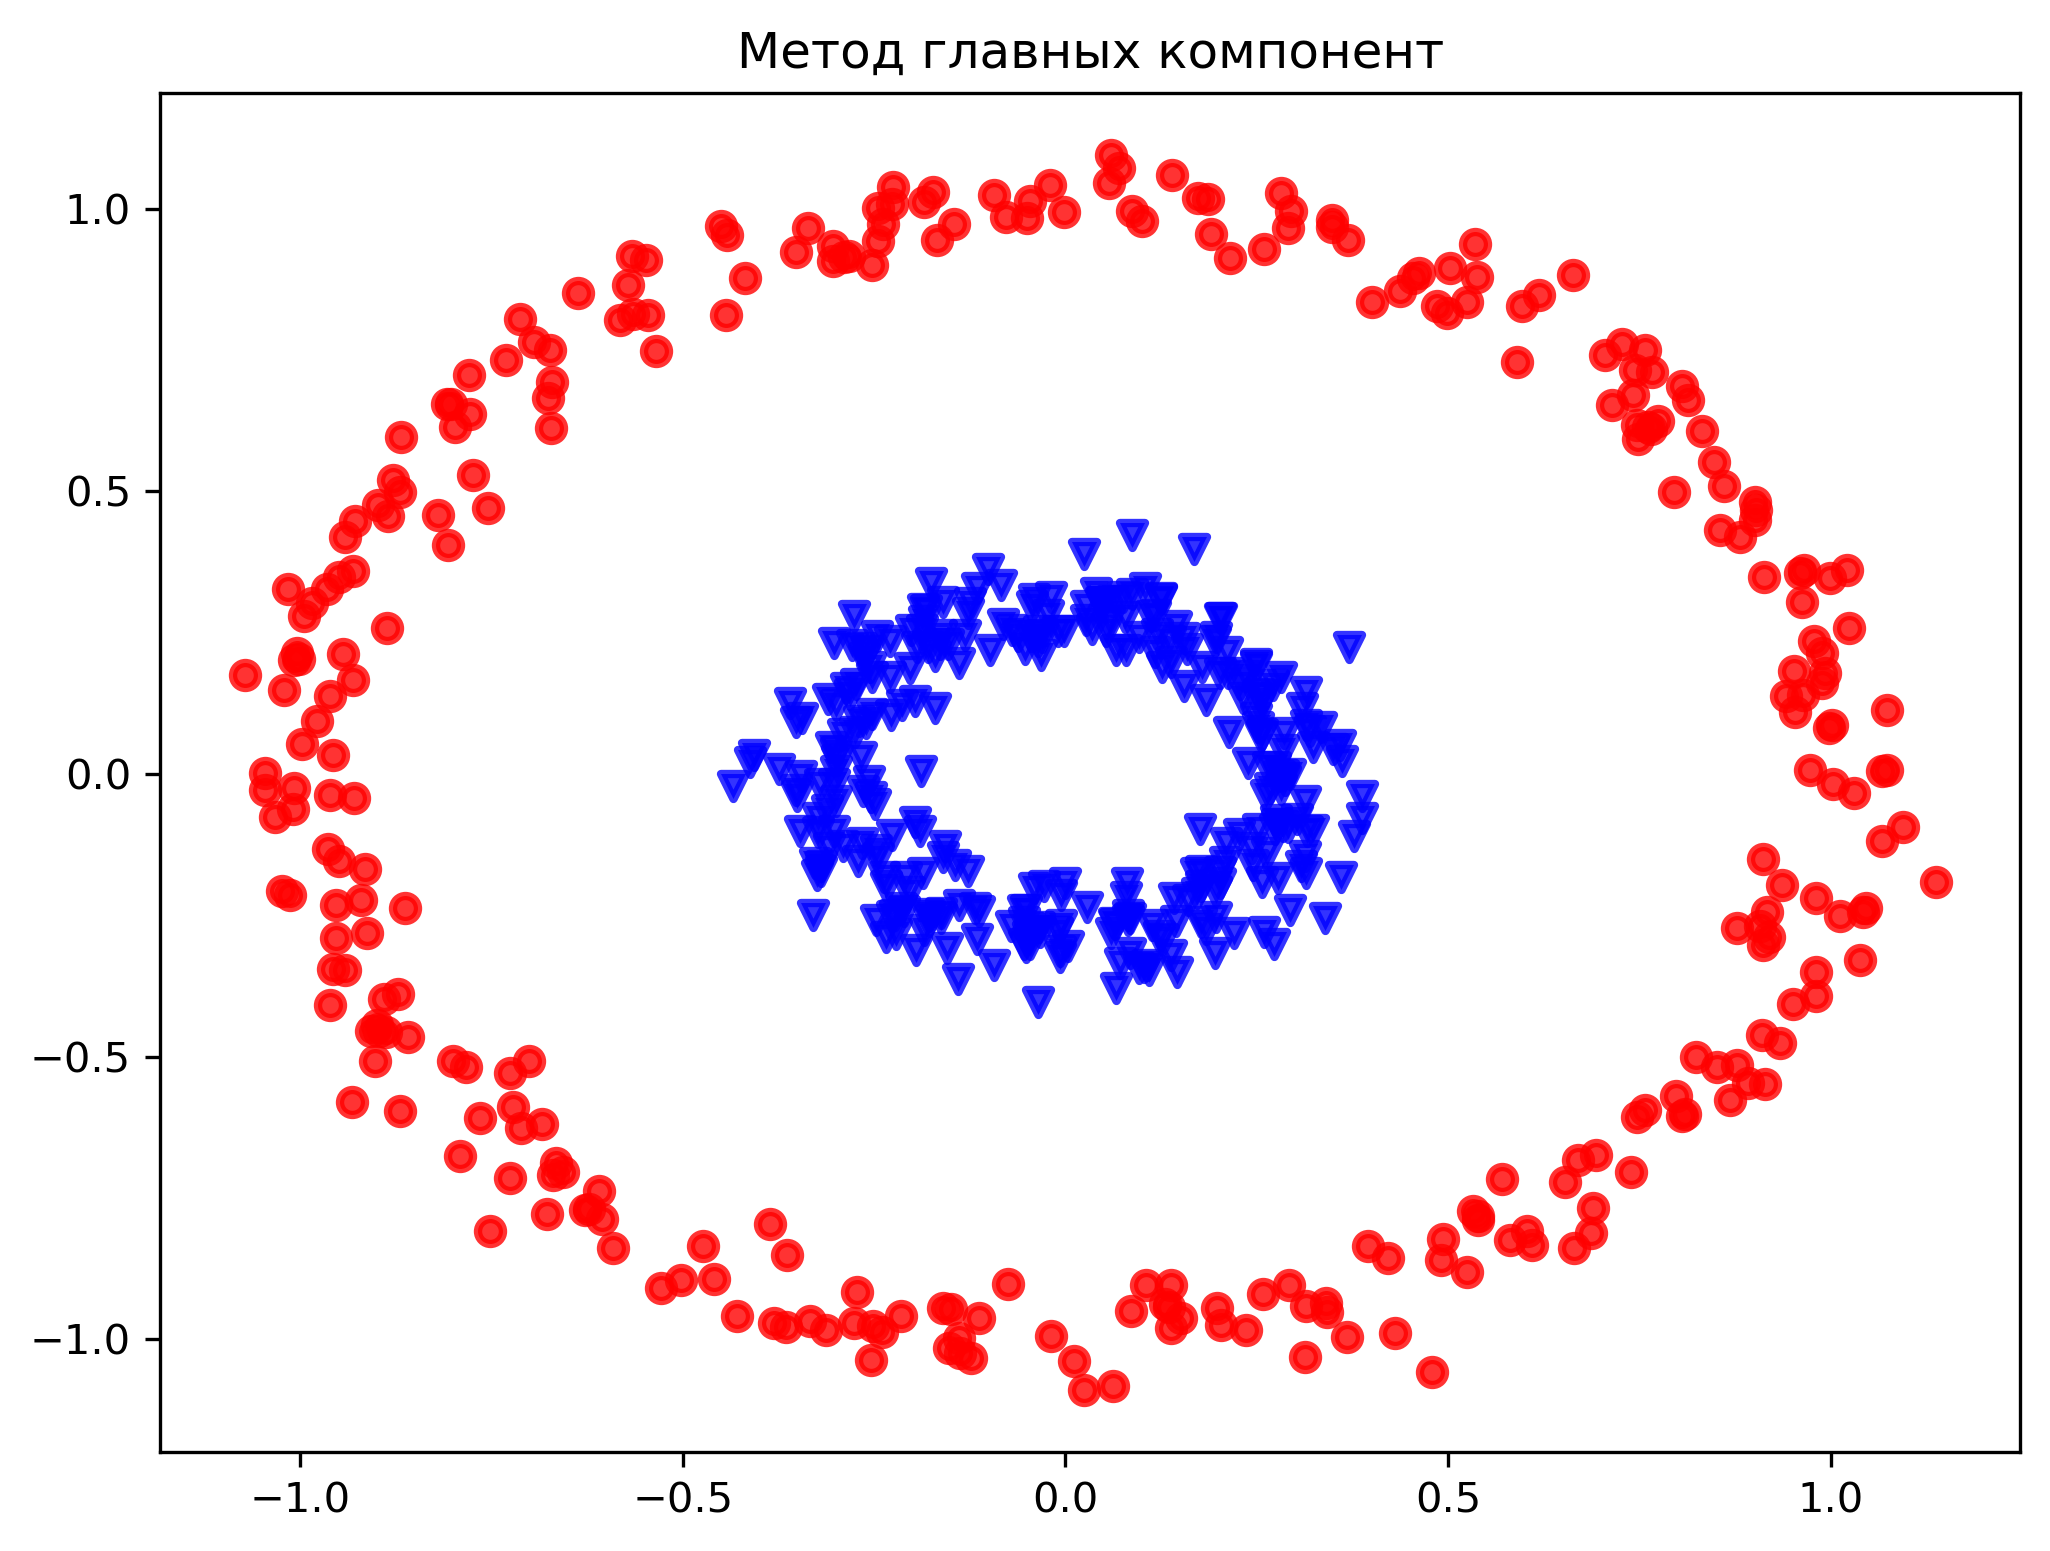

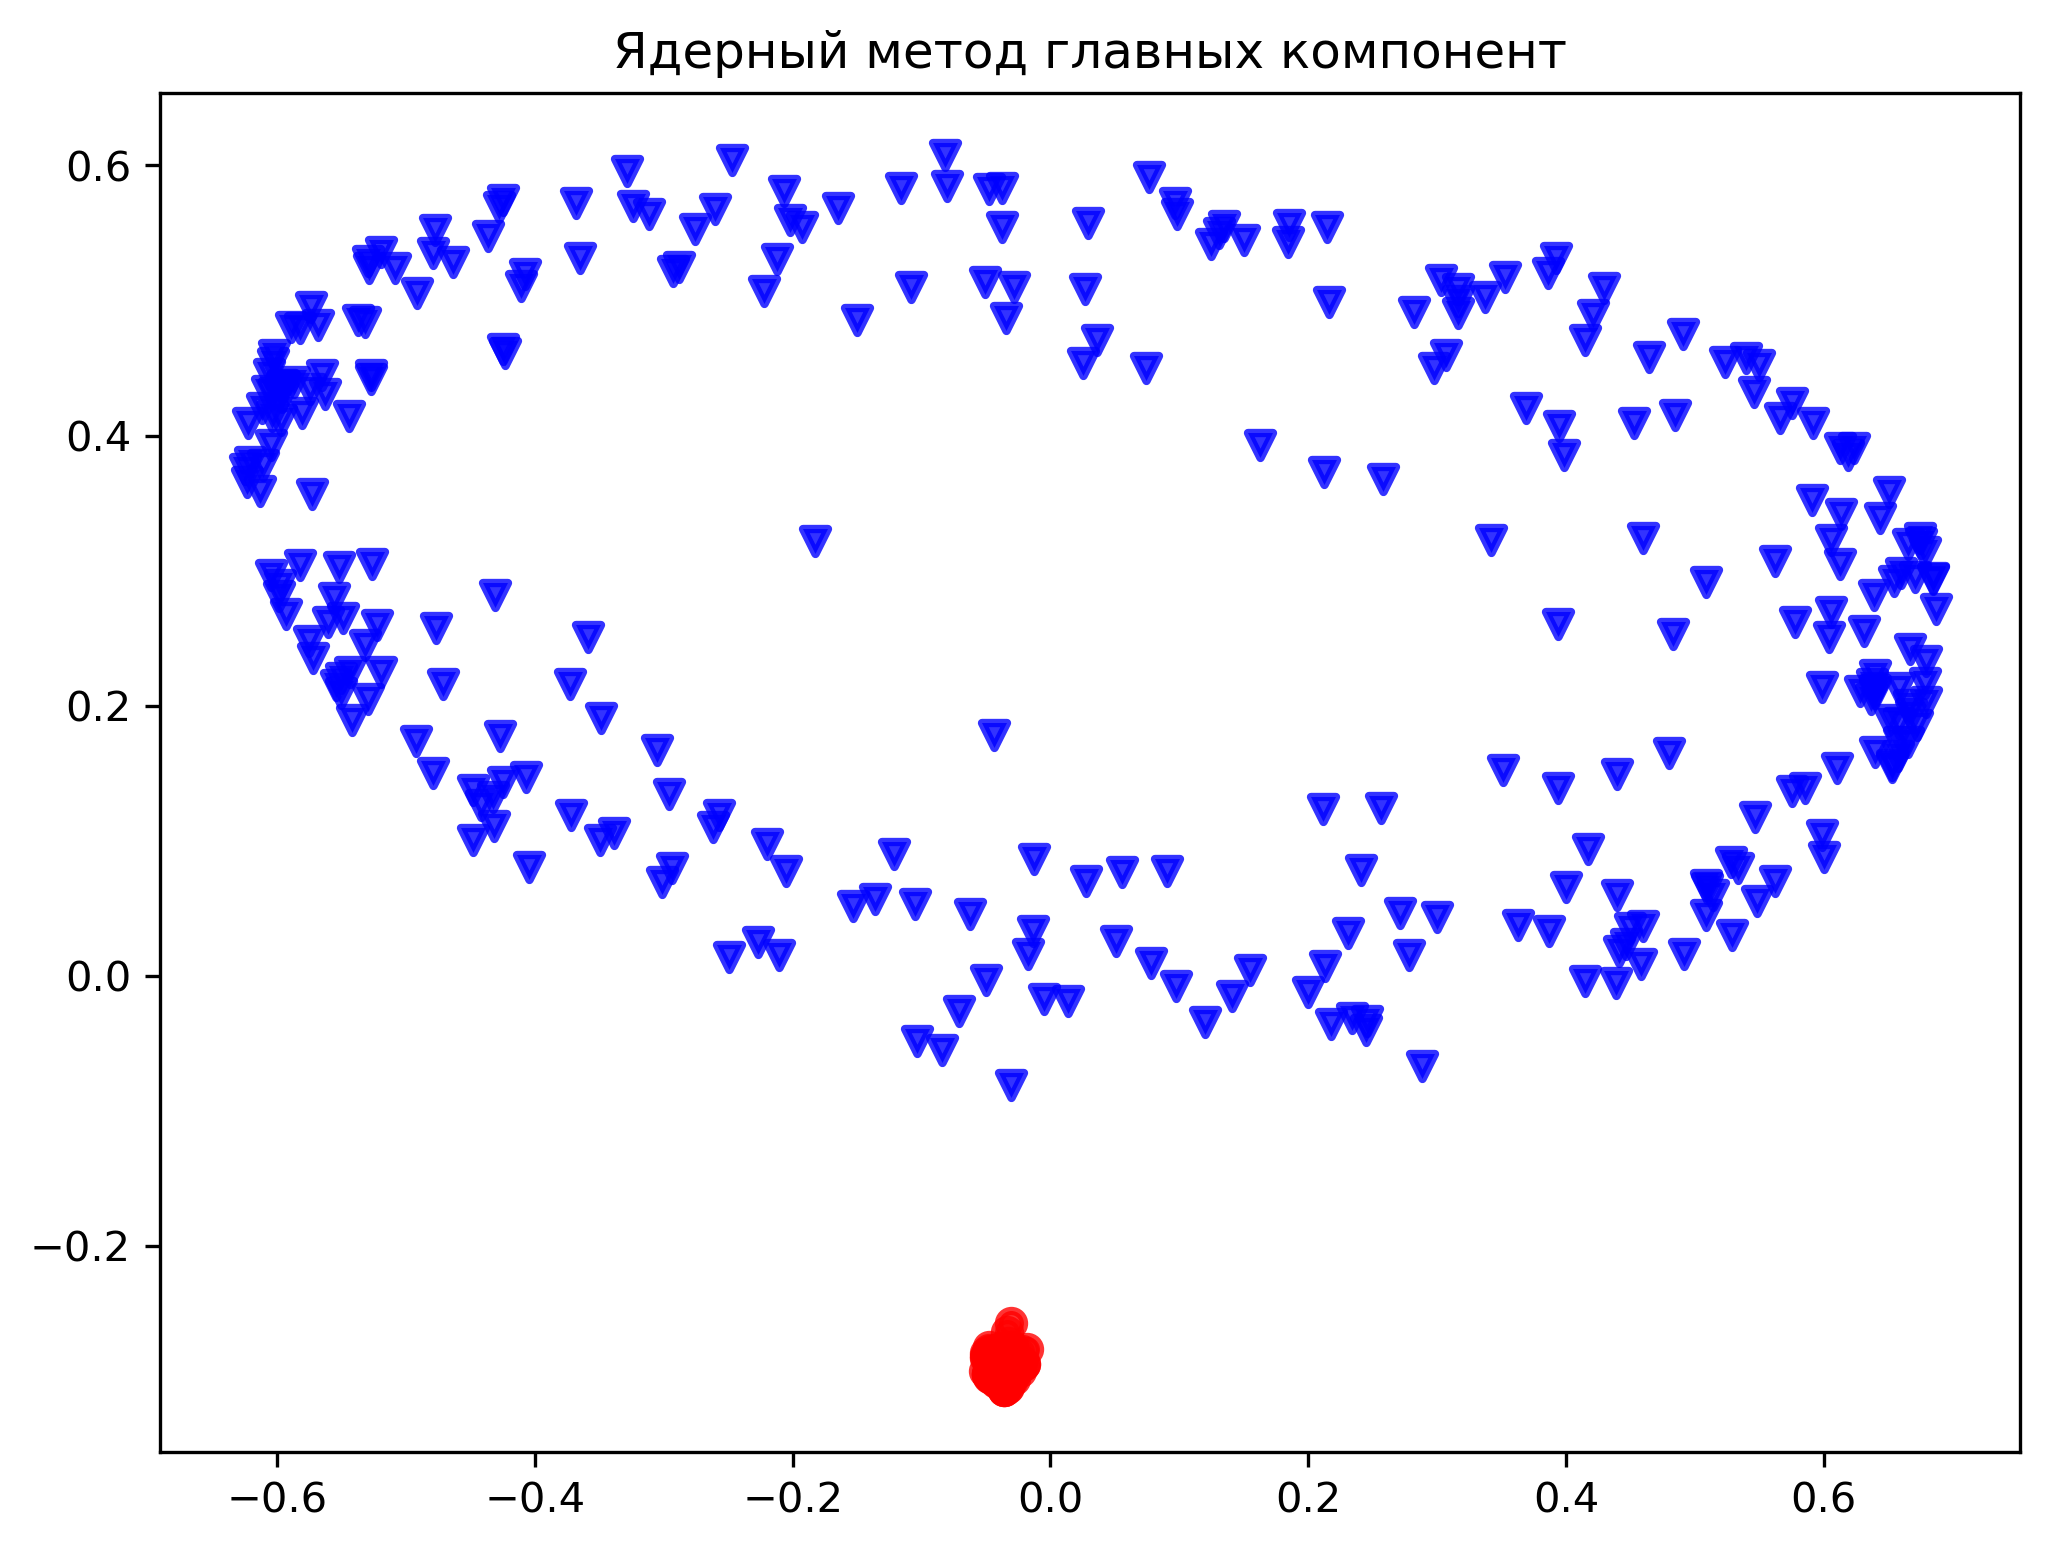

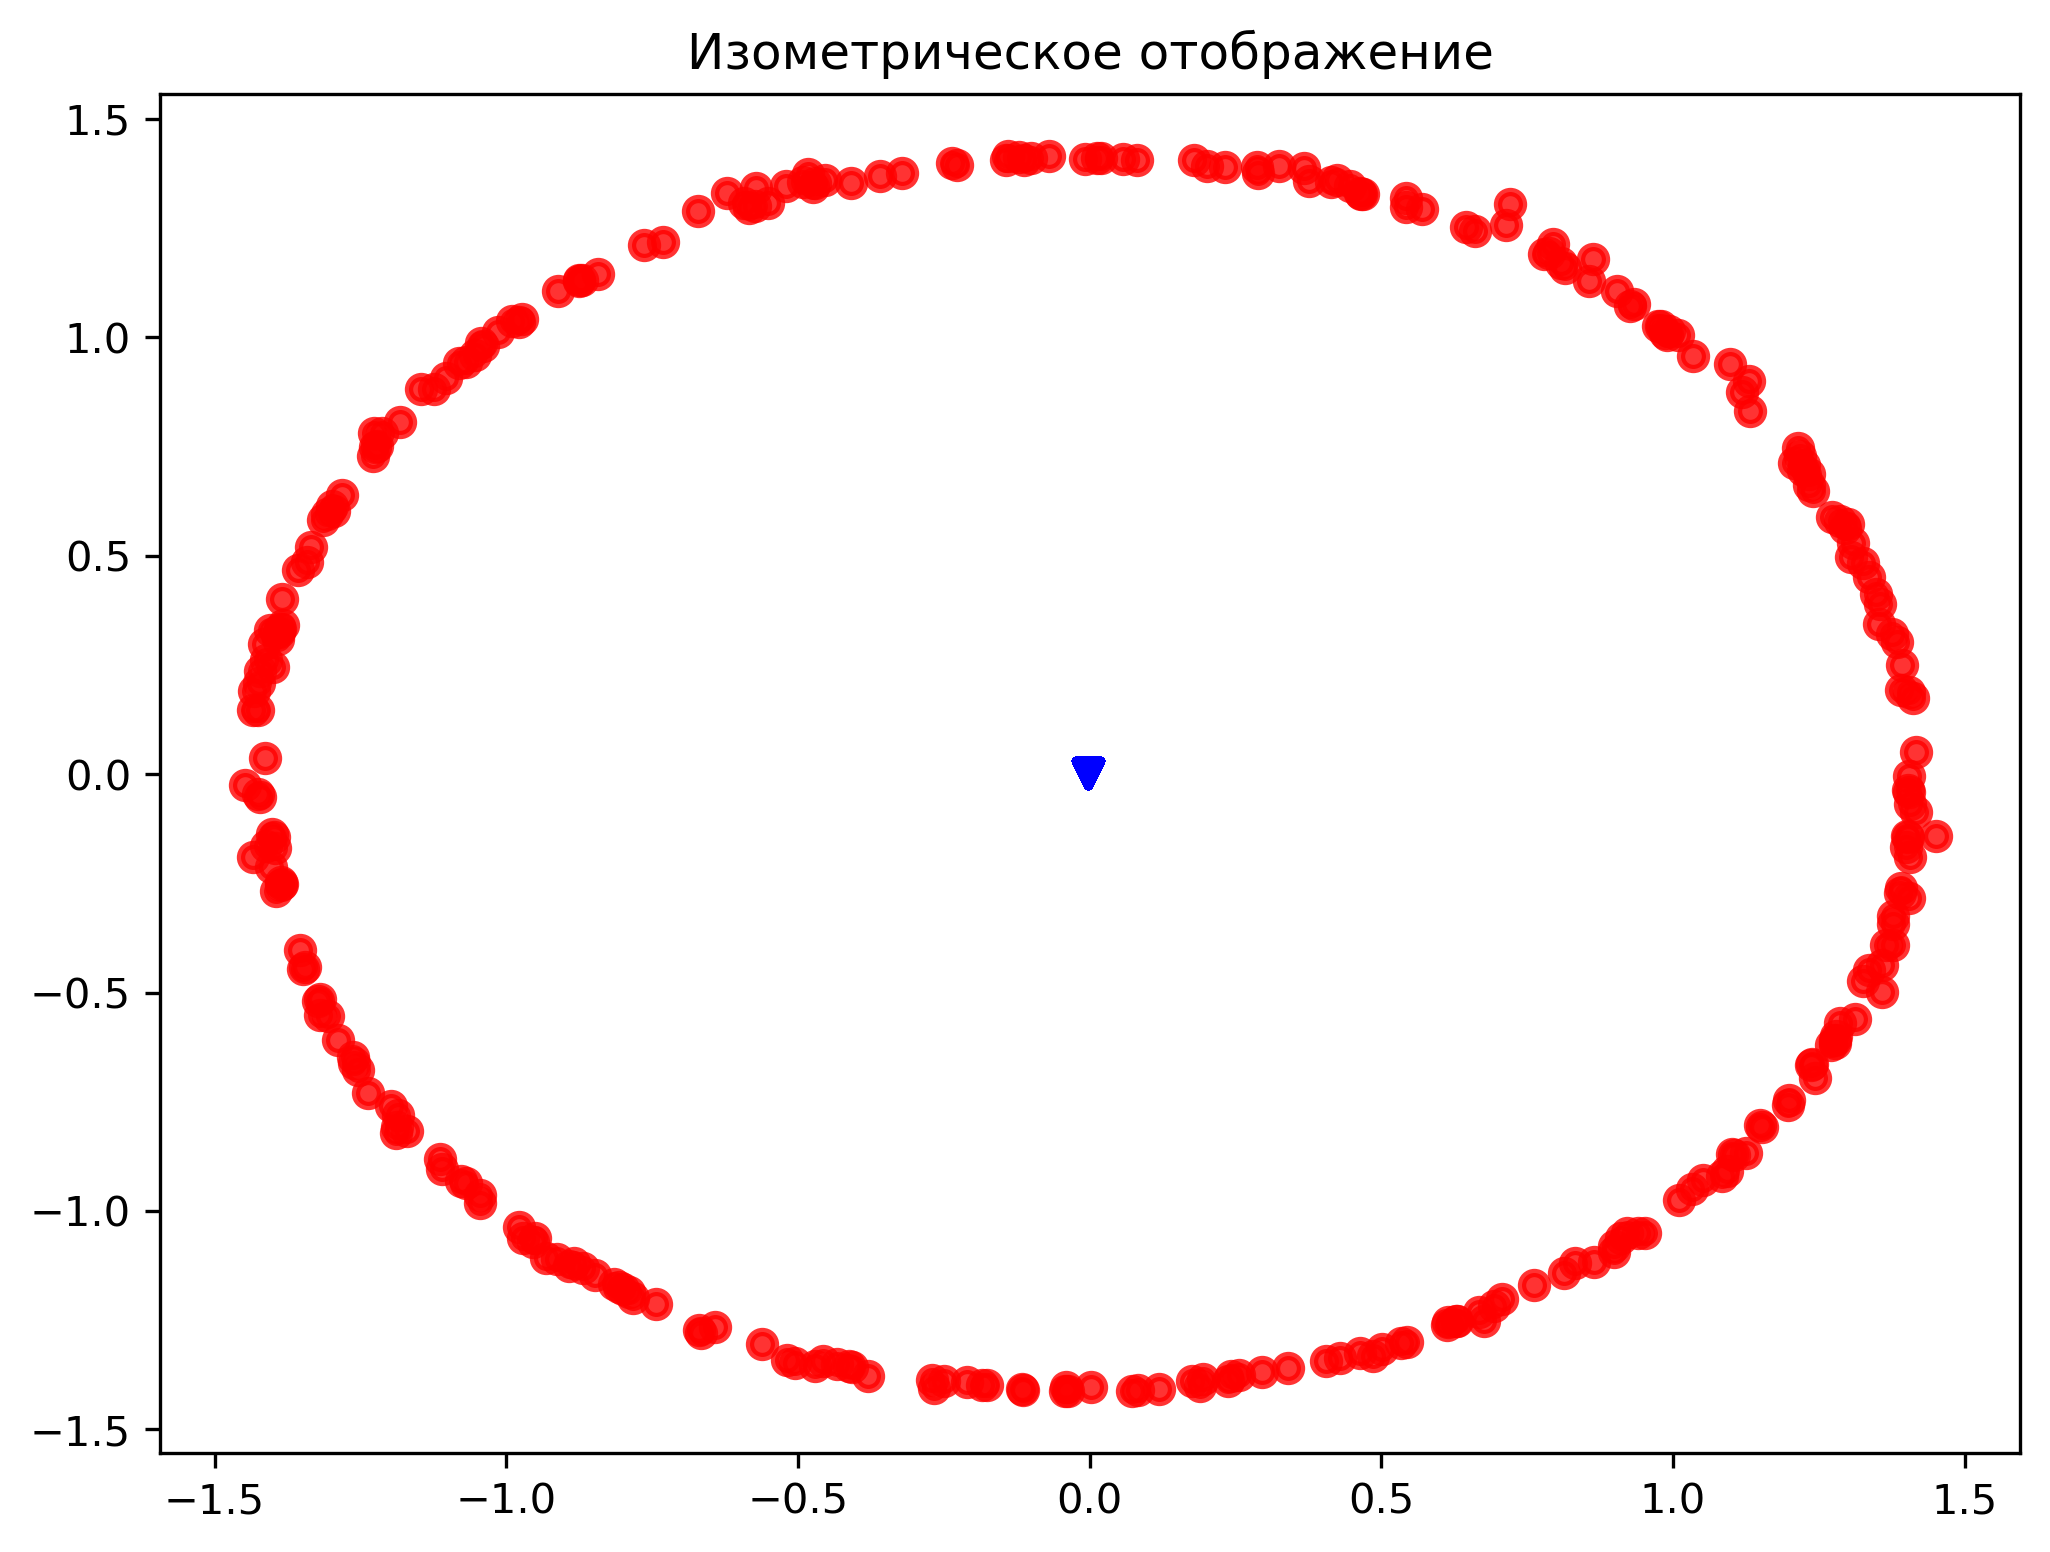

In [13]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=600, factor=.3, noise=.05)
# std_scaler = StandardScaler()
# X = std_scaler.fit_transform(X, y)

kernels = ["linear", "poly", "rbf", "sigmoid", "cosine", "precomputed"]

kpca = KernelPCA(n_components=2, kernel="rbf", fit_inverse_transform=False, gamma=10)
X_kpca = kpca.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

iso = Isomap(n_neighbors=10, n_components=2)
X_iso = iso.fit_transform(X)

markers = ["o" , "v"]
colors = ["r", "b"]

plt.figure(figsize=(8,6), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1], target_names, colors):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, marker=marker, alpha=.8, lw=lw)
plt.title('Оригинальные данные')

plt.figure(figsize=(8,6), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1], target_names, colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, marker=marker, alpha=.8, lw=lw)
plt.title('Метод главных компонент')

plt.figure(figsize=(8,6), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1], target_names, colors):
    plt.scatter(X_kpca[y == i, 0], X_kpca[y == i, 1], color=color, marker=marker, alpha=.8, lw=lw)
plt.title('Ядерный метод главных компонент')

plt.figure(figsize=(8,6), dpi=300)
for marker, i, target_name, color in zip(markers, [0, 1], target_names, colors):
    plt.scatter(X_iso[y == i, 0], X_iso[y == i, 1], color=color, marker=marker, alpha=.8, lw=lw)
plt.title('Изометрическое отображение')

plt.show()

In [2]:
import xgboost as xgb

In [58]:
!pip install xgboost

You should consider upgrading via the 'd:\apps\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                             GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [6]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

# стандартизируем входные данные
std_scaler = StandardScaler()
# X = std_scaler.fit_transform(X, y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], X[:, 2], shuffle=True, train_size=0.8, random_state=42)

linear_regressor = LinearRegression().fit(X_train, y_train)
linear_regressor.score(X_test, y_test)

0.8924486678535346

In [34]:
X, y = datasets.load_iris(return_X_y=True)
X = std_scaler.fit_transform(X, y)

logistic_regressor = LogisticRegression().fit(X, y)
logistic_regressor.score(X, y)

0.9733333333333334

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], X[:, 2], shuffle=True, train_size=0.8, random_state=42)

decision_tree_regressor = DecisionTreeRegressor().fit(X_train, y_train)
decision_tree_regressor.score(X_test, y_test)

0.7652998378338673

In [40]:
X, y = datasets.load_iris(return_X_y=True)
X = std_scaler.fit_transform(X, y)

decision_tree_classifier = DecisionTreeClassifier().fit(X[:120], y[:120])
decision_tree_classifier.score(X[120:], y[120:])

0.8

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], X[:, 2], shuffle=True, train_size=0.8, random_state=42)

random_forest_regressor = RandomForestRegressor().fit(X_train, y_train)
random_forest_regressor.score(X_test, y_test)

0.8647248070839374

In [43]:
X, y = datasets.load_iris(return_X_y=True)
X = std_scaler.fit_transform(X, y)

random_forest_classifier = RandomForestClassifier().fit(X[:120], y[:120])
random_forest_classifier.score(X[120:], y[120:])

0.7666666666666667

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], X[:, 2], shuffle=True, train_size=0.8, random_state=42)

gradient_boosting_regressor = GradientBoostingRegressor().fit(X_train, y_train)
gradient_boosting_regressor.score(X_test, y_test)

0.9220325636458855

In [46]:
X, y = datasets.load_iris(return_X_y=True)
X = std_scaler.fit_transform(X, y)

gradient_boosting_classifier = GradientBoostingClassifier().fit(X[:120], y[:120])
gradient_boosting_classifier.score(X[120:], y[120:])

0.7333333333333333

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], X[:, 2], shuffle=True, train_size=0.8, random_state=42)

svr = SVR().fit(X_train, y_train)
svr.score(X_test, y_test)

0.9259582254049503

In [49]:
X, y = datasets.load_iris(return_X_y=True)
X = std_scaler.fit_transform(X, y)

svc = SVC().fit(X[:120], y[:120])
svc.score(X[120:], y[120:])

0.8

In [50]:
X, y = datasets.load_iris(return_X_y=True)
X = std_scaler.fit_transform(X, y)

gauss_naive = GaussianNB().fit(X[:120], y[:120])
gauss_naive.score(X[120:], y[120:])

0.9333333333333333

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], X[:, 2], shuffle=True, train_size=0.8, random_state=42)

knn_regressor = KNeighborsRegressor().fit(X_train, y_train)
knn_regressor.score(X_test, y_test)

0.9379912871018595

In [53]:
X, y = datasets.load_iris(return_X_y=True)
X = std_scaler.fit_transform(X, y)

knn_classifier = KNeighborsClassifier().fit(X[:120], y[:120])
knn_classifier.score(X[120:], y[120:])

0.7666666666666667

In [56]:
X, y = datasets.load_iris(return_X_y=True)
X = std_scaler.fit_transform(X, y)

knn_classifier = KMeans().fit(X[:120], y[:120])
knn_classifier.score(X[120:], y[120:])

-20.645809038511548

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax', "num_class": 3}
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:1.00000	train-auc:0.99219
[1]	eval-auc:1.00000	train-auc:0.99792
[2]	eval-auc:1.00000	train-auc:0.99813
[3]	eval-auc:1.00000	train-auc:0.99906
[4]	eval-auc:1.00000	train-auc:0.99948
[5]	eval-auc:1.00000	train-auc:0.99990
[6]	eval-auc:1.00000	train-auc:1.00000
[7]	eval-auc:1.00000	train-auc:1.00000
[8]	eval-auc:1.00000	train-auc:1.00000
[9]	eval-auc:1.00000	train-auc:1.00000


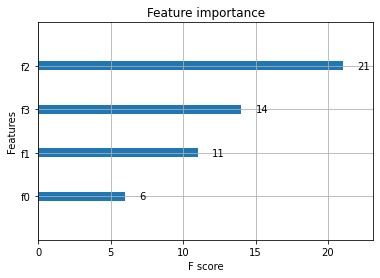

In [9]:
xgb.plot_importance(bst)

In [11]:
!pip install graphviz

You should consider upgrading via the 'd:\apps\python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
!sudo apt-get install graphviz

In [134]:
X.shape

(150, 4)

In [125]:
len(X[:, 0:1])

600

# Алгоритм K-средних

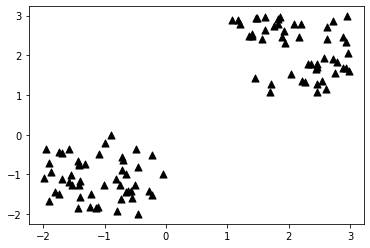

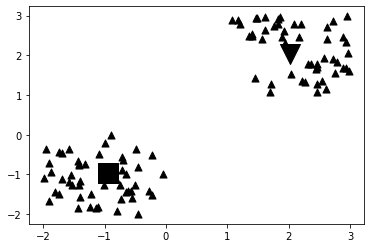

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'k', marker='^')
plt.show()

k_means_model = KMeans(n_clusters=2)
k_means_model.fit(X)
k_means_model.cluster_centers_
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='k',marker='^')
plt.scatter(-0.94665068, -0.97138368, s=400, c='k', marker=',')
plt.scatter(2.01559419, 2.02597093, s=400, c='k', marker='v')
plt.show()